<a href="https://colab.research.google.com/github/JoaquinV13/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB02_Reglas_de_Asociacio%CC%81n_y_Patrones_Secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2 - Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Joaquín Vilaplana

Adrián García-Arroba

# Inicialización

Librerías usadas:

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from scipy.stats import pearsonr

Durante el trabajo por motivos de versiones se ha necesitado poner el siguiente código para eviter que aparezca numerosas veces un warning.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Práctica 1 (reglas de Asociación)
Valor (5 puntos)

Usa la librería mlxtend que nos permita solucionar todos los problemas relacionados con las reglas de asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta información que este genera. Usa la librería con el Dataset Market_Basket_Optimisation.csv que se ha proporcionado.

1.- (1 puntos) Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

2.- (1 punto) ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.

3.- (1 punto) ¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

4.- (1 punto) Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

5.- (1 punto) Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?

Para obtener los datos pedidos anteriormente, se hará uso de la librería de la siguiente manera (pasos a seguir):

* Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su soporte.

* A partir de k=2.

  - Mostrar los itemset frecuentes candidatos y su soporte.

* Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

* Mostrar todas las posibles reglas con la confianza de cada una de ellas.

* Listar todas las reglas que sean de alta confianza.

* Usar los siguientes métodos.
  - Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor.
  - Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

* Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los datos.


In [ ]:
# Cargar los datos
data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

A continucación se va a conocer como están guardados los datos y además que se está estudiando. Para esto utilizamos métodos de pandas.

In [ ]:
print(data.info())

Comprobamos como todas las columnas son de tipo 'object' y hay muchos valores NaN. Mostramos las primeras filas de los datos para ver que hay en los registros más a fondo.

In [ ]:
data.head()

Al mostrar la base de datos comprobamos como nos encontramos un dataframe que no está procesado, por lo que habrá que procesarlo más tarde.

Vemos como tiene registros de compras de un supermercado que no tienen orden temporal. Por esto se sacarán reglas de asociación utilizando el método apriori para poder sacar conclusiones que mejoren el rendimiento financiero del negocio.

In [ ]:
# Forma de los datos (número de filas y columnas)
print(data.shape)

Los datos muestran que hay un total de 7501 filas y 20 columnas. Cada fila representa una transacción y cada columna representa un artículo comprado en esa transacción. Por lo que en total hay 7501 registros y el registro con más items tiene longitud 20.

In [ ]:
# Verificar si hay valores nulos (NaNs)
print(data.isnull().sum())

Las columnas tienen diferentes cantidades de valores nulos, con la primera columna teniendo todos los valores no nulos y las siguientes columnas teniendo cada vez menos valores no nulos.

Sabiendo como es el formato del dataframe de origen lo formateamos para poder utilizarlo en apriori.

In [ ]:
# Preprocesamiento
transactions = data.values.tolist()
transactions_clean = [[item for item in transaction if item is not np.nan] for transaction in transactions]
print(' -> Transacciones en formato de lista (mostramos solo 3):')
print(f"[...,{transactions_clean[1]}, {transactions_clean[2]}, {transactions_clean[3]}, ...]")

In [ ]:
# Codificación de las transacciones
te = TransactionEncoder()
te_ary = te.fit(transactions_clean).transform(transactions_clean)
df = pd.DataFrame(te_ary, columns=te.columns_)

Mostramos el dataframe final:

In [ ]:
df.head()

Podemos comprobar que se ha puesto en un formato booleano, indicando un True en la fila donde el item se incluye en el registro.

Esto se formatea así porque como más tarde se verá lo requiere el método apriori.

Mostramos las dimensiones del dataframe tras haberlo procesado para poder trabajar en el documento.

In [ ]:
df.shape

Vemos que contiene 7501 registros y 120 items distintos.

Ahora mostramos la información sobre los métodos utilizados en python: apriori y association_rules.

Información de la instrucción para hacer el método apriori.

In [ ]:
help(apriori)

La función `apriori` de la biblioteca `mlxtend` tiene los siguientes hiperparámetros:

- `df`: DataFrame o matriz codificada de manera eficiente que ofrece una representación condensada de los datos de entrada.

- `min_support`: Un valor flotante entre 0 y 1 para el soporte mínimo de los itemsets a crear. Por defecto es `0.5`. El soporte es una medida de cuán frecuentemente aparece un itemset en el conjunto de datos.

- `use_colnames`: Booleano para indicar si se deben usar los nombres de las columnas de los DataFrames en lugar de las columnas. Por defecto es `False`.

- `max_len`: Entero para indicar la longitud máxima de los itemsets generados. Si es `None` (por defecto), se generan todos los itemsets posibles.

- `verbose`: Entero para indicar el nivel de detalle que la función debe proporcionar mientras se ejecuta. Por defecto es `0`, lo que significa que no se proporciona ninguna salida.

In [ ]:
# Generar itemsets frecuentes
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

Mostramos el output que devuelve el método:

In [ ]:
frequent_itemsets

Mostramos los items más vendidos:

In [ ]:
print(frequent_itemsets[frequent_itemsets['support'] > 0.1])

Información de la instrucción para formar reglas:

In [ ]:
help(association_rules)

La función `association_rules` de la biblioteca `mlxtend` tiene los siguientes hiperparámetros:

- `df` (DataFrame): DataFrame de los itemsets frecuentes generados por la función `apriori`.

- `metric` (str): Métrica a utilizar para la selección de reglas. Las opciones disponibles son "support", "confidence", "lift", "leverage" y "conviction". Estas métricas son medidas de la "interesanteza" o "calidad" de las reglas de asociación.

- `min_threshold` (float): El valor mínimo para la métrica especificada. Solo las reglas que tienen una métrica mayor o igual a este umbral son seleccionadas.

- `support_only` (bool): Un parámetro opcional que, si se establece en True, la función `association_rules` solo calculará el soporte y devolverá las reglas de asociación sin calcular ninguna otra métrica².

In [ ]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

Mostramos el output:

In [ ]:
rules

Vemos que tiene distintas métricas, a continuación explicamos cada una de ellas para utilizarlas más adelante:


1. **Antecedent Support**: Es la proporción de transacciones que contienen el antecedente.
   $$ \text{Antecedent Support} = \frac{\text{Número de transacciones con antecedente}}{\text{Número total de transacciones}} $$

2. **Consequent Support**: Es la proporción de transacciones que contienen el consequent.
   $$ \text{Consequent Support} = \frac{\text{Número de transacciones con consequent}}{\text{Número total de transacciones}} $$

3. **Support**: Es la proporción de transacciones que contienen tanto el antecedente como el consequent. Mide la frecuencia relativa de la regla en el conjunto de datos.
   $$ \text{Support} = \frac{\text{Número de transacciones con antecedente y consequent}}{\text{Número total de transacciones}} $$

4. **Confidence**: Es la probabilidad condicional de que el consecuente ocurra dado el antecedente. Se calcula como el soporte de la regla dividido por el soporte del antecedente.
   $$ \text{Confidence} = \frac{\text{Support}(\text{Antecedent} \rightarrow \text{Consequent})}{\text{Support}(\text{Antecedent})} $$

5. **Lift**: Indica cuánto más probable es que ocurra el consecuente dado el antecedente en comparación con si fueran eventos independientes. Lift igual a 1 implica independencia, mientras que lift mayor que 1 indica asociación positiva.
   $$ \text{Lift} = \frac{\text{Support}(\text{Antecedent} \rightarrow \text{Consequent})}{\text{Support}(\text{Antecedent}) \times \text{Support}(\text{Consequent})} $$

6. **Leverage**: Mide la diferencia entre la frecuencia observada de la regla y la frecuencia esperada si los antecedentes y los consecuentes fueran independientes. Un valor positivo indica una contribución positiva a la asociación.
   $$ \text{Leverage} = \text{Support}(\text{Antecedent} \rightarrow \text{Consequent}) - \text{Support}(\text{Antecedent}) \times \text{Support}(\text{Consequent}) $$

7. **Conviction**: Mide la asimetría en la dependencia entre antecedentes y consecuentes. Valores mayores que 1 indican fuerte dependencia.
   $$ \text{Conviction} = \frac{1 - \text{Support}(\text{Consequent})}{1 - \text{Confidence}(\text{Antecedent} \rightarrow \text{Consequent})}$$

8. **Zhang's Metric**: Es una métrica adicional que cuantifica la fuerza de la relación entre antecedentes y consecuentes. Es otra medida de la dependencia entre ellos. Esta métrica toma valores en el rango de -1 a 1. Un valor de 1 indica una asociación positiva perfecta, un valor de -1 indica una asociación negativa perfecta, y un valor de 0 indica independencia.

   $$ \text{Zhang's Metric =}=\frac{\text{Support}(\text{Antecedent} \rightarrow \text{Consequent}) - \text{Support}(\text{Antecedent}) \times \text{Support}(\text{Consequent})}{\max \left[ \text{Support}(\text{Antecedent}) \times (1 - \text{Support}(\text{Consequent})), \text{Support}(\text{Consequent}) \times (1 - \text{Support}(\text{Antecedent})) \right]} $$

Ahora repetimos el proceso, pero explicamos como se pide en el ejercicio paso a paso. Para poder llegar a valor de k más altos se ha seleccionado un soporte bajo.

Comenzamos seleccionado los itemsets frecuentes para el soporte = 0.001 (0.1%) y calculando las reglas con una confianza de 0.3. En este caso las métricas no son relevantes, solo tratan de ilustrar el proceso seguido.

In [129]:
# Obtener itemsets frecuentes
frequent_itemsets_bajo = apriori(df, min_support=0.001, use_colnames=True)

# Mostrar reglas con diferentes configuraciones
rules = association_rules(frequent_itemsets_bajo, metric="confidence",
                                     min_threshold=0.3)

Mostramos los itemsets para k = 1 que son frecuentes con el soporte elegido habiendo utilizado el método apriori.

In [130]:
frequent_itemsets_1 = frequent_itemsets_bajo[frequent_itemsets_bajo['itemsets'].apply(lambda x: len(x)) == 1]

print('\n -> Itemsets de longitud 1 frecuentes:\n')
print(frequent_itemsets_1)


 -> Itemsets de longitud 1 frecuentes:

      support             itemsets
0    0.020397            (almonds)
1    0.008932  (antioxydant juice)
2    0.004666          (asparagus)
3    0.033329            (avocado)
4    0.004533        (babies food)
..        ...                  ...
111  0.029463  (whole wheat pasta)
112  0.058526   (whole wheat rice)
113  0.011465               (yams)
114  0.027330        (yogurt cake)
115  0.009465           (zucchini)

[116 rows x 2 columns]


En total 115 items han salido frecuentes de los 120 totales que contiene la muestra.

Mostramos las reglas obtenidas para los itemsets de k = 2

In [131]:
rules_2 = rules[rules.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1) == 2]

print('\n -> Reglas con itemsets de longitud 2:\n')
print(rules_2[['antecedents', 'consequents', 'confidence', 'lift']])


 -> Reglas con itemsets de longitud 2:

         antecedents      consequents  confidence      lift
0          (almonds)           (eggs)    0.320261  1.782108
1          (almonds)  (mineral water)    0.372549  1.562914
2        (asparagus)  (mineral water)    0.457143  1.917801
3          (avocado)  (mineral water)    0.348000  1.459926
4      (babies food)      (chocolate)    0.382353  2.333628
..               ...              ...         ...       ...
136  (strong cheese)      (spaghetti)    0.482759  2.772720
137            (tea)      (spaghetti)    0.379310  2.178566
138   (tomato sauce)      (spaghetti)    0.443396  2.546642
139       (tomatoes)      (spaghetti)    0.306043  1.757755
140       (zucchini)      (spaghetti)    0.323944  1.860568

[141 rows x 4 columns]


Mostramos las reglas obtenidas para los itemsets de k = 3

In [132]:
rules_3 = rules[rules.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1) == 3]

print('\n -> Reglas con itemsets de longitud 3:\n')
print(rules_3[['antecedents', 'consequents', 'confidence', 'lift']])


 -> Reglas con itemsets de longitud 3:

                        antecedents  consequents  confidence      lift
141              (chicken, almonds)    (burgers)    0.555556  6.371899
142                 (eggs, almonds)    (burgers)    0.346939  3.979186
143              (burgers, almonds)       (eggs)    0.435897  2.425569
144         (french fries, almonds)    (burgers)    0.303030  3.475582
145          (ground beef, almonds)    (burgers)    0.310345  3.559475
...                             ...          ...         ...       ...
2447             (tomatoes, turkey)  (spaghetti)    0.448980  2.578711
2448     (tomatoes, vegetables mix)  (spaghetti)    0.416667  2.393121
2449  (tomatoes, whole wheat pasta)  (spaghetti)    0.500000  2.871746
2450   (whole wheat rice, tomatoes)  (spaghetti)    0.511111  2.935562
2451     (whole wheat rice, turkey)  (spaghetti)    0.301887  1.733884

[2311 rows x 4 columns]


Mostramos las reglas obtenidas para los itemsets de k = 4

In [133]:
rules_4 = rules[rules.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1) == 4]

print('\n -> Reglas con itemsets de longitud 4:\n')
print(rules_4[['antecedents', 'consequents', 'confidence', 'lift']])


 -> Reglas con itemsets de longitud 4:

                                      antecedents      consequents  \
2452                   (milk, spaghetti, almonds)      (chocolate)   
2453                   (milk, almonds, chocolate)      (spaghetti)   
2454              (spaghetti, almonds, chocolate)           (milk)   
2455              (spaghetti, almonds, chocolate)  (mineral water)   
2456          (mineral water, almonds, chocolate)      (spaghetti)   
...                                           ...              ...   
4851  (whole wheat rice, tomatoes, mineral water)      (spaghetti)   
4852        (whole wheat rice, spaghetti, turkey)  (mineral water)   
4853    (whole wheat rice, turkey, mineral water)      (spaghetti)   
4854              (olive oil, tomatoes, pancakes)      (spaghetti)   
4855              (tomatoes, spaghetti, pancakes)      (olive oil)   

      confidence      lift  
2452    0.727273  4.438790  
2453    0.500000  2.871746  
2454    0.444444  3.429813  
24

Mostramos las reglas obtenidas para los itemsets de k = 5

In [134]:
rules_5 = rules[rules.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1) == 5]

print('\n -> Reglas con itemsets de longitud 5:\n')
print(rules_5[['antecedents', 'consequents', 'confidence', 'lift']])


 -> Reglas con itemsets de longitud 5:

                                            antecedents  \
4856           (french fries, eggs, burgers, spaghetti)   
4857           (french fries, eggs, burgers, chocolate)   
4858              (eggs, burgers, spaghetti, chocolate)   
4859         (french fries, eggs, spaghetti, chocolate)   
4860      (french fries, spaghetti, burgers, chocolate)   
...                                                 ...   
5140  (ground beef, spaghetti, pancakes, mineral water)   
5141  (ground beef, herb & pepper, spaghetti, pancakes)   
5142  (herb & pepper, spaghetti, pancakes, mineral w...   
5143  (ground beef, herb & pepper, spaghetti, minera...   
5144             (ground beef, herb & pepper, pancakes)   

                     consequents  confidence      lift  
4856                 (chocolate)    0.470588  2.872158  
4857                 (spaghetti)    0.571429  3.281995  
4858              (french fries)    0.400000  2.340406  
4859                  

Mostramos las reglas obtenidas para los itemsets de k = 6

In [135]:
rules_6 = rules[rules.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1) == 6]

print('\n -> Reglas con itemsets de longitud 6:\n')
print(rules_6[['antecedents', 'consequents', 'confidence', 'lift']])


 -> Reglas con itemsets de longitud 6:

                                            antecedents  \
5145  (milk, ground beef, frozen vegetables, mineral...   
5146  (milk, ground beef, frozen vegetables, mineral...   
5147  (milk, ground beef, frozen vegetables, spaghet...   
5148  (milk, ground beef, mineral water, spaghetti, ...   
5149  (milk, frozen vegetables, mineral water, spagh...   
5150  (ground beef, frozen vegetables, mineral water...   
5151  (milk, ground beef, frozen vegetables, spaghetti)   
5152  (milk, ground beef, frozen vegetables, chocolate)   
5153      (milk, ground beef, chocolate, mineral water)   
5154          (milk, ground beef, spaghetti, chocolate)   
5155    (milk, frozen vegetables, spaghetti, chocolate)   
5156  (ground beef, frozen vegetables, chocolate, mi...   
5157  (ground beef, frozen vegetables, spaghetti, ch...   

                             consequents  confidence       lift  
5145                         (chocolate)    0.571429   3.487621  


Mostramos las reglas obtenidas para los itemsets de k = 7

In [136]:
rules_7 = rules[rules.apply(lambda row: len(row['antecedents']) + len(row['consequents']), axis=1) == 7]

print('\n -> Reglas con itemsets de longitud 7:\n')
print(rules_7[['antecedents', 'consequents', 'confidence', 'lift']])


 -> Reglas con itemsets de longitud 7:

Empty DataFrame
Columns: [antecedents, consequents, confidence, lift]
Index: []


Podemos comprobar que ya no existen reglas que tengan este soporte y confianza especificados. Si ajustaramos los parámetros podrían acabarse para un k inferior o superior, en función de lo deseado.

Para el resto del ejercicio se compararán diversos valores para las métricas y el soporte umbral.

## 1.- (1 puntos)

Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación.

En este apartado se van a probar cuatro configuraciones que van a combinar un valor para el soporte que determina los itemsets que devuelve el método apriori y otro valor para la confianza umbral de las reglas que devuelve el método association_rules.

Las combianciones son:

*   *CASO 1:* Soporte = 0.01, confianza = 0.3
*   *CASO 2:* Soporte = 0.03, confianza = 0.3
*   *CASO 3:* Soporte = 0.01, confianza = 0.5
*   *CASO 4:* Soporte = 0.03, confianza = 0.5


In [137]:
# Configuración 1: soporte=0.01, confianza=0.3
frequent_itemsets_1 = apriori(df, min_support=0.01, use_colnames=True)
rules_c1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print("-------------------------------------------------------------------------------------------------")
print("\n\n -> Reglas generadas con soporte=0.01 y confianza=0.3:\n")
print(rules_c1[['antecedents','consequents','confidence']])

# Configuración 2: soporte=0.03, confianza=0.3
frequent_itemsets_2 = apriori(df, min_support=0.03, use_colnames=True)
rules_c2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.3)
print("-------------------------------------------------------------------------------------------------")
print("\n\n -> Reglas generadas con soporte=0.03 y confianza=0.3:\n")
print(rules_c2[['antecedents','consequents','confidence']])

# Configuración 3: soporte=0.01, confianza=0.5
frequent_itemsets_1 = apriori(df, min_support=0.01, use_colnames=True)
rules_c3 = association_rules(frequent_itemsets_1, metric="confidence", min_threshold=0.5)
print("-------------------------------------------------------------------------------------------------")
print("\n\n -> Reglas generadas con soporte=0.01 y confianza=0.5:\n")
print(rules_c3[['antecedents','consequents','confidence']])

# Configuración 4: soporte=0.03, confianza=0.5
frequent_itemsets_2 = apriori(df, min_support=0.03, use_colnames=True)
rules_c4 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.5)
print("-------------------------------------------------------------------------------------------------")
print("\n\n -> Reglas generadas con soporte=0.03 y confianza=0.5:\n")
print(rules_c4[['antecedents','consequents','confidence']])

-------------------------------------------------------------------------------------------------


 -> Reglas generadas con soporte=0.01 y confianza=0.3:

                   antecedents      consequents  confidence
0                    (avocado)  (mineral water)    0.348000
1                    (burgers)           (eggs)    0.330275
2                       (cake)  (mineral water)    0.338816
3                    (cereals)  (mineral water)    0.398964
4                    (chicken)  (mineral water)    0.380000
..                         ...              ...         ...
58       (milk, mineral water)      (spaghetti)    0.327778
59      (olive oil, spaghetti)  (mineral water)    0.447674
60  (olive oil, mineral water)      (spaghetti)    0.371981
61       (spaghetti, pancakes)  (mineral water)    0.455026
62   (pancakes, mineral water)      (spaghetti)    0.339921

[63 rows x 3 columns]
-------------------------------------------------------------------------------------------------


 

El **soporte** y la **confianza** son dos métricas clave en las reglas de asociación:

- **Soporte**: Representa la frecuencia relativa con la que aparecen los antecedentes y los consecuentes juntos. En otras palabras, es la proporción de transacciones en los datos que contienen un conjunto de elementos (itemset) específico.

- **Confianza**: Mide con qué frecuencia los artículos en Y aparecen en transacciones que también contienen X.

Ahora, analizando cómo estos parámetros afectan los resultados de las reglas de asociación generadas:

1. **Reglas con soporte=0.01 y confianza=0.3**: Se generaron **63 reglas**. Esto indica que al tener un soporte y una confianza bajos, se pueden generar muchas reglas, pero estas pueden no ser muy fuertes (la confianza de estas reglas varía, pero no es muy alta).

2. **Reglas con soporte=0.03 y confianza=0.3**: Se generaron **6 reglas**. Al aumentar el soporte a 0.03, el número de reglas generadas disminuye. Esto se debe a que estamos buscando reglas que se cumplan en un mayor número de transacciones, siendo menos itemsets los que pueden servir para hacer reglas.

3. **Reglas con soporte=0.01 y confianza=0.5**: Se generaron **2 reglas**. Al aumentar la confianza a 0.5, el número de reglas generadas disminuye significativamente. Esto se debe a que estamos buscando reglas que se cumplan con una alta confianza, lo que es más difícil de encontrar.

4. **Reglas con soporte=0.03 y confianza=0.5**: No se generaron reglas. Esto indica que no hay reglas que se cumplan con una alta confianza (0.5) en un gran número de transacciones (soporte de 0.03).

Hemos comprobado como aumentar el soporte y la confianza hace que las reglas generadas sean más fuertes (es decir, se cumplen en más transacciones y con mayor confianza), pero también hace que sea más difícil encontrar dichas reglas. Por lo tanto, es importante elegir estos parámetros cuidadosamente para equilibrar la cantidad y la calidad de las reglas generadas.

## 2.- (1 punto)

¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos.

Soporte: Es la proporción de transacciones en las que aparece un conjunto de elementos. Se expresa como el número de transacciones que contienen el conjunto dividido por el número total de transacciones.

Frecuencia: Es simplemente el número de veces que aparece un conjunto de elementos en el conjunto de datos.

In [138]:
# Calcular soporte
support = df.sum() / len(df)

# Calcular frecuencia
frequency = df.sum()

print(support)

print(frequency)

 asparagus           0.000133
almonds              0.020397
antioxydant juice    0.008932
asparagus            0.004666
avocado              0.033329
                       ...   
whole wheat pasta    0.029463
whole wheat rice     0.058526
yams                 0.011465
yogurt cake          0.027330
zucchini             0.009465
Length: 120, dtype: float64
 asparagus             1
almonds              153
antioxydant juice     67
asparagus             35
avocado              250
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  86
yogurt cake          205
zucchini              71
Length: 120, dtype: int64


Se van a realizar dos boxplots para ver la distribución de las variables "support" y "frequency" y comparar las distribuciones entre las dos variables.

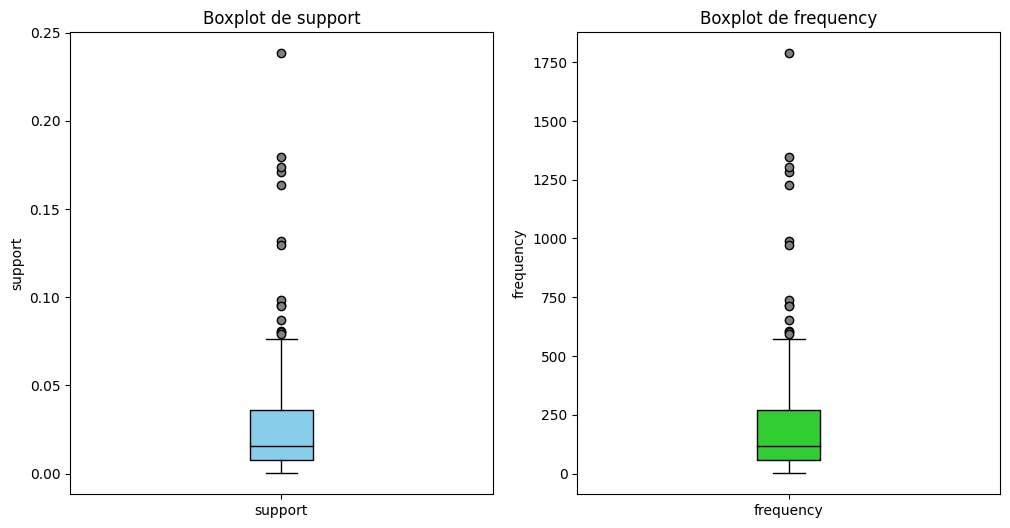

<Figure size 640x480 with 0 Axes>

In [139]:
plt.figure(figsize=(12, 6))  # Establece el tamaño de la figura

# Grafica el boxplot para Soporte
plt.subplot(1, 2, 1)
plt.boxplot(support,
            labels=['support'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'skyblue', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos
plt.title('Boxplot de support')
plt.ylabel('support')

# Grafica el boxplot para Frecuencia
plt.subplot(1, 2, 2)
plt.boxplot(frequency,
            labels=['frequency'],
            patch_artist=True,  # Habilitar el relleno de colores
            boxprops={'facecolor': 'limegreen', 'edgecolor': 'black'},  # Color de la caja
            medianprops={'color': 'black'},  # Color de la línea mediana
            flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'black'},  # Color de los valores atípicos
            whiskerprops={'color': 'black'},  # Color de las líneas de bigotes
            capprops={'color': 'black'})  # Color de las líneas de extremos

plt.title('Boxplot de frequency')
plt.ylabel('frequency')
plt.show()

# Muestra el gráfico combinado
plt.tight_layout()
plt.show()

Como se puede observar, los dos gráficos son exactamente iguales. Las variables están totalmente relacionadas.

Ahora para ver de nuevo esta correlación, se va a llevar a cabo una dispersión de puntos.

El coeficiente de correlación de Pearson es: 1.000


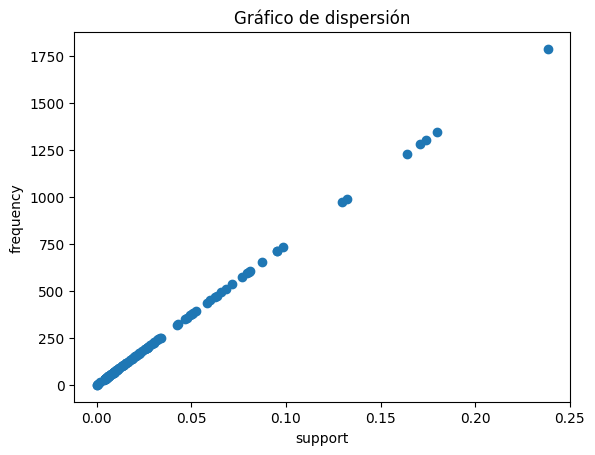

In [140]:
# Calcula el coeficiente de correlación de Pearson
corr, _ = pearsonr(support, frequency)

print('El coeficiente de correlación de Pearson es: %.3f' % corr)
plt.scatter(support, frequency)

plt.title('Gráfico de dispersión')
plt.xlabel('support')
plt.ylabel('frequency')

plt.show()

Podemos comprobar como la recta es perfecta igual que la correlación, por loq ue se confirma que son lo mismo y su distribución es igual.

Esto tambien era algo que sabiamos porque el soporte se calcula a partir de la frecuencia siguiendo la siguiente fórmula:

$$ {soporte} = {frecuencia}/{registros} $$

$$ {soporte} = {frecuencia}/7501 $$

## 3.- (1 punto)

¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

Para conocer más como eran las reglas del *Apartado 1* las mostramos en función de la confianza y el soporte. Aunque hay muchas métricas hemos considerado estas dos relevantes, porque la confianza explica la fiabilidad de la regla y el soporte explica la frecuencia de aparición de la regla. Por esto, al combinar estas dos métricas podemos clasificar las reglas en fiables y frecuentes, siendo criterios muy poderosos para obtener conclusiones relevantes.

En el eje vertical se mide la variable "confidence" y en el horizontal el "support". Cada regla de asociación quedará por lo tanto ubicada en un punto en el plano según su confianza y soporte. Tenemos tres colores para las configuraciones, que son rojo (Caso 1), azul (Caso 2) y verde (Caso 3), siendo estos:

*   CASO 1: Soporte = 0.01, confianza = 0.3
*   CASO 2: Soporte = 0.03, confianza = 0.3
*   CASO 3: Soporte = 0.01, confianza = 0.5

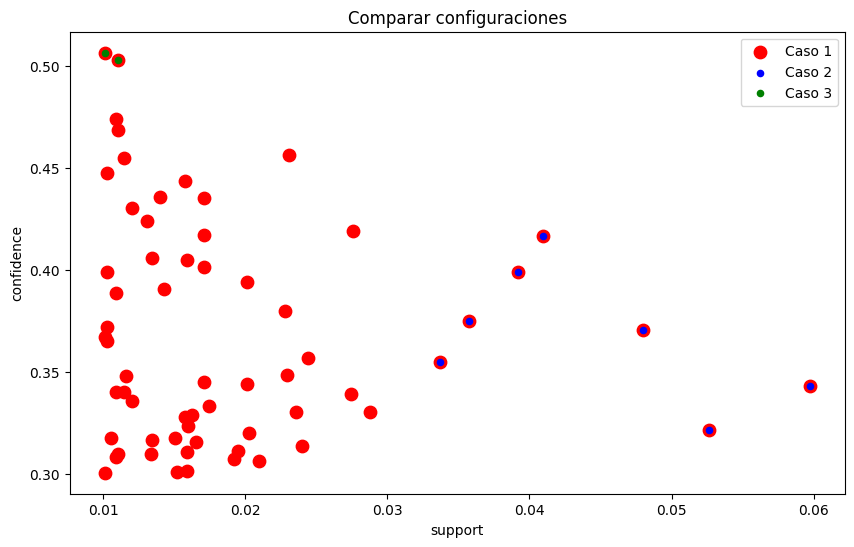

In [141]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión para cada conjunto de datos con diferentes tamaños de puntos
scatter1 = plt.scatter(rules_c1['support'], rules_c1['confidence'], s=80, color='red')
scatter2 = plt.scatter(rules_c2['support'], rules_c2['confidence'], s=20, color='blue')
scatter3 = plt.scatter(rules_c3['support'], rules_c3['confidence'], s=20, color='green')

plt.xlabel('support')
plt.ylabel('confidence')
plt.title("Comparar configuraciones")

# Fijar los límites de los ejes x e y
# plt.xlim([0.005, 0.08])
# plt.ylim([0.2, 0.6])

# Leyenda
plt.legend((scatter1, scatter2, scatter3),
 ('Caso 1', 'Caso 2', 'Caso 3'))

plt.show()


Las conclusiones que da la gráfica son muy evidentes y reflejan el cuidado que hay que tener al elegir los umbrales para la frecuencia y la métrica de la regla (en este caso la confianza).

En primer lugar, se puede ver visualmente en la grafica como el caso 1 (soporte mayor a 0.01 y confianza mayor a 0.03) contiene al caso 2 (soporte mayor a 0.03 y confianza mayor a 0.3) y al caso 3 (soporte mayor a 0.01 y confianza mayor a 0.5), ya que sus umbrales son menores y por tanto si cumplen la restricción del caso 1 que es menos restrictiva evidentementa estará dentro del caso 2 y 3. Comprobamos además como si bajamos los umbrales aparecen muchisimas más reglas.

En segundo lugar, donde mayor concentración de reglas hay es donde la confianza y el soporte son bajos (ver la zona con confianza 0.30-0.35 y soporte 0.01-0.02), esto es evidente ya que cuanto menos alto es el umbral más posible es que sea más fácil que una regla lo cumpla.

En tercer lugar, comprobamos en la gráfica como es muy complicado que haya reglas con alto soporte y alta confianza, por lo tanto al aumentar los umbrales se pierden reglas que pueden ser muy interesantes. Por ejemplo, vemos que el caso 3 no contiene las reglas del caso 2 que tienen alto soporte. Esto es prueba de que es importante probar varios criterios y comparar su reglas para abarcar un mayor abanico de posibilidades y poder encontrar las reglas más prometedoras.

Por lo tanto, hay que encontrar un equilibro, para no perder reglas buenas. Por ejemplo podemos ver que hay dos reglas que no están ni en el caso 2 ni el 3 porque están en el centro de la gráfica, por eso a continuación establecemos un criterio intermedio entre esos dos casos:

* Soporte: 0.0022
* Confianza: 0.4

In [142]:
rules_c1[(rules_c1.support>0.022)&(rules_c1.confidence>0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
23,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962,0.461536
28,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221


Comprobamos que salen tres, porque hay una regla del caso 2 que también cumple con las condiciones puestas.

Por lo tanto, analizando estas tres reglas de asociación para extraer conclusiones en un supermercado:

1. **Regla 1 (Ground Beef -> Mineral Water)**:
   - El **support** para el itemset **{ground beef}** es del **9.83%** (0.098254).
   - La **confianza** de la regla es del **41.66%** (0.416554), lo que significa que el **41.66%** de las transacciones que contienen **ground beef** también contienen **mineral water**.
   - El **lift** es de **1.75**, lo que indica que la probabilidad de comprar **mineral water** aumenta **1.75 veces** cuando se compra **ground beef**.
   - El **leverage** es **0.0175**, lo que sugiere una relación positiva entre **ground beef** y **mineral water**.
   - El **conviction** es **1.31**, lo que implica que la compra de **ground beef** no está fuertemente influenciada por la presencia de **mineral water**.

2. **Regla 2 (Olive Oil -> Mineral Water)**:
   - El **support** para el itemset **{olive oil}** es del **6.59%** (0.065858).
   - La **confianza** de la regla es del **41.90%** (0.419028), lo que significa que el **41.90%** de las transacciones que contienen **olive oil** también contienen **mineral water**.
   - El **lift** es de **1.76**, lo que indica que la probabilidad de comprar **mineral water** aumenta **1.76 veces** cuando se compra **olive oil**.
   - El **leverage** es **0.0119**, lo que sugiere una relación positiva entre **olive oil** y **mineral water**.
   - El **conviction** es **1.31**, lo que implica que la compra de **olive oil** no está fuertemente influenciada por la presencia de **mineral water**.

3. **Regla 3 (Soup -> Mineral Water)**:
   - El **support** para el itemset **{soup}** es del **5.05%** (0.050527).
   - La **confianza** de la regla es del **45.64%** (0.456464), lo que significa que el **45.64%** de las transacciones que contienen **soup** también contienen **mineral water**.
   - El **lift** es de **1.91**, lo que indica que la probabilidad de comprar **mineral water** aumenta **1.91 veces** cuando se compra **soup**.
   - El **leverage** es **0.0110**, lo que sugiere una relación positiva entre **soup** y **mineral water**.
   - El **conviction** es **1.40**, lo que implica que la compra de **soup** no está fuertemente influenciada por la presencia de **mineral water**.

En resumen, estas reglas indican que hay una asociación positiva entre **ground beef**, **olive oil** y **soup** con **mineral water** en el supermercado. Los clientes que compran estos productos también tienden a comprar **mineral water**. Sin embargo, la fuerza de esta asociación varía según la regla específica.

## 4.- (1 punto)

Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

En este apartado se van a utilizar las siguientes métricas:

1. Confianza
2. Lift
3. Soporte
4. Convicción
5. Leverage

El objetivo es comparar el resultado obtenido y ver que tipo de reglas aparecen usando cada métrica. Un factor que se ha visto clave es la frecuencia del item de la regla, por eso se verá cómo se comporta cada métrica y qué tipo de items tiene. Para eso se utilizará un gráfico de tarta que muestra la frecuencia de aparición de los items en las reglas de esa métrica.

Comenzamos volviendo a encontrar los items frecuentes con un umbral de soporte de 0.01.

In [143]:
# Generar itemsets frecuentes
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, ground beef, mineral water)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(milk, spaghetti, mineral water)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


Obtenemos las reglas utilizando la confianza con un umbral de 0.4:

In [144]:
# Generar reglas de asociación
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Imprimir las reglas generadas
print(f"\n\n -> Reglas generadas con confidence={0.4}:")
print(rules_confidence[['antecedents', 'consequents', 'confidence', 'lift']])



 -> Reglas generadas con confidence=0.4:
                       antecedents      consequents  confidence      lift
0                    (ground beef)  (mineral water)    0.416554  1.747522
1                      (olive oil)  (mineral water)    0.419028  1.757904
2                         (salmon)  (mineral water)    0.401254  1.683336
3                           (soup)  (mineral water)    0.456464  1.914955
4                (eggs, chocolate)  (mineral water)    0.405622  1.701663
5         (ground beef, chocolate)  (mineral water)    0.473988  1.988472
6                (milk, chocolate)  (mineral water)    0.435685  1.827780
7           (spaghetti, chocolate)  (mineral water)    0.404762  1.698053
8              (ground beef, eggs)  (mineral water)    0.506667  2.125563
9                     (milk, eggs)  (mineral water)    0.424242  1.779778
10       (milk, frozen vegetables)  (mineral water)    0.468927  1.967236
11  (frozen vegetables, spaghetti)  (mineral water)    0.430622  1.80

La única regla que aquí no tiene como consecuente el agua mineral es la 13: carne picada y agua como antecedente y espaguetis como consecuente. Esto suponemos que se debe a lo usual que es cocinar espaguetis con carne picada, ya que suele ser un plato típico, fácil de cocinar y barato.

$$\text{ground beef, mineral water} \rightarrow \text{spaghetti}$$

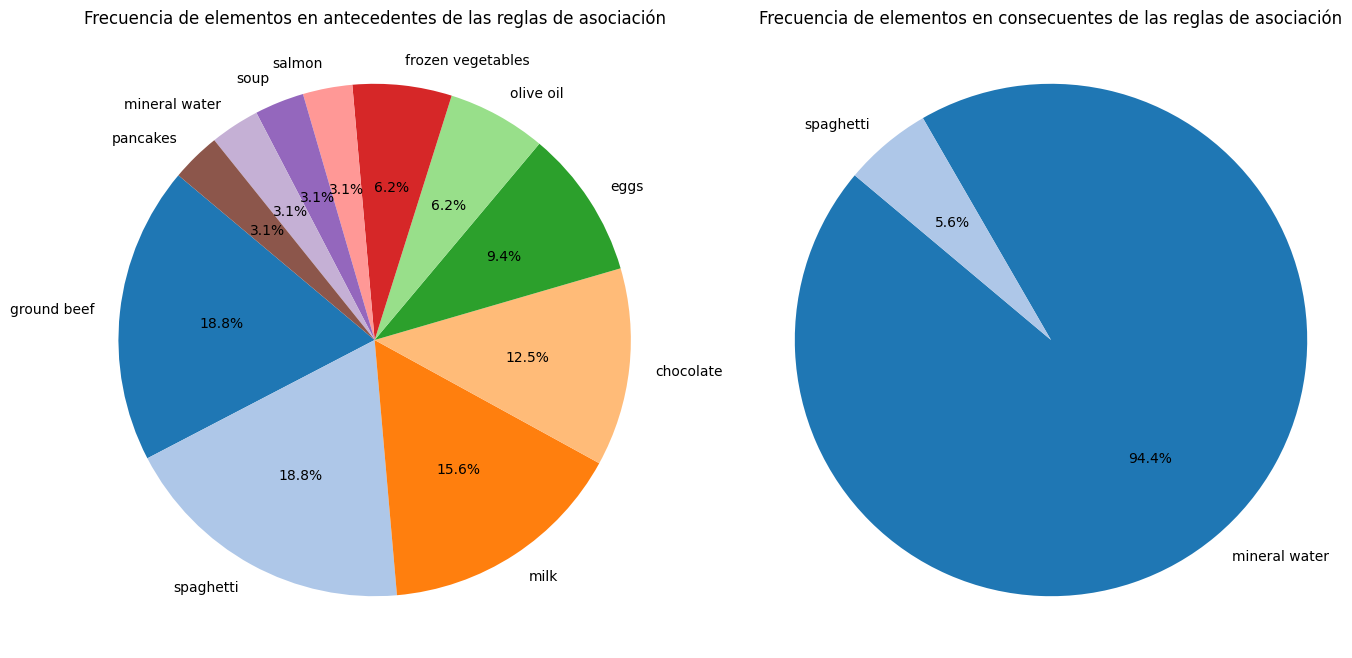

In [145]:
# Extraer antecedentes y contar su frecuencia
antecedents_counts = rules_confidence['antecedents'].explode().value_counts()

# Extraer consecuentes y contar su frecuencia
consequents_counts = rules_confidence['consequents'].explode().value_counts()

# Colores para las secciones del gráfico
colors = plt.cm.tab20.colors  # Colores del conjunto de colores tab20

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para antecedentes
axes[0].pie(antecedents_counts, labels=antecedents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Frecuencia de elementos en antecedentes de las reglas de asociación')
axes[0].axis('equal')

# Gráfico para consecuentes
axes[1].pie(consequents_counts, labels=consequents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Frecuencia de elementos en consecuentes de las reglas de asociación')
axes[1].axis('equal')

# Mostrar los gráficos
plt.show()

Los alimentos con más aparición en los antecedentes son: la carne picada, espaguetis, leche y chocolate. Sin embargo, lo que más importante que se destaca de estos gráficos es la presencia casi total de agua mineral como consecuente de las reglas generadas. Al ser algo que casi todo el mundo compra, se acaba relacionando con muchos otros alimentos en reglas, que también suelen ser comunes ya que el agua se usa para cocinar o simplemente para acompañar la comida o la cena.

Obtenemos las reglas utilizando el lift con un umbral de 2.35:

In [146]:
# Generar reglas de asociación
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=2.35)

# Imprimir las reglas generadas
print(f"\n\n -> Reglas generadas con lift={2.35}:")
print(rules_lift[['antecedents', 'consequents', 'confidence', 'lift']])



 -> Reglas generadas con lift=2.35:
                           antecedents                         consequents  \
0                             (shrimp)                 (frozen vegetables)   
1                  (frozen vegetables)                            (shrimp)   
2                  (frozen vegetables)                          (tomatoes)   
3                           (tomatoes)                 (frozen vegetables)   
4                        (ground beef)                     (herb & pepper)   
5                      (herb & pepper)                       (ground beef)   
6                (milk, mineral water)                 (frozen vegetables)   
7   (frozen vegetables, mineral water)                              (milk)   
8                               (milk)  (frozen vegetables, mineral water)   
9                  (frozen vegetables)               (milk, mineral water)   
10        (ground beef, mineral water)                         (spaghetti)   
11          (spaghetti, mi

Como ya se vio anteriormente, la compra de carne molida y agua mineral aumenta en 2.39 veces la probabilidad de comprar espaguetis. De manera similar, la presencia de espaguetis aumenta en 2.39 veces la probabilidad de comprar carne molida y agua mineral. Esto sugiere una relación específica entre estos tres elementos.

Las reglas están relacionadas dos a dos (o hasta en grupos de tres), es decir que si comprar tomates hace que sea más probable comprar verduras, comprar verduras también hace más probable comprar tomates, aparecen las dos reglas.

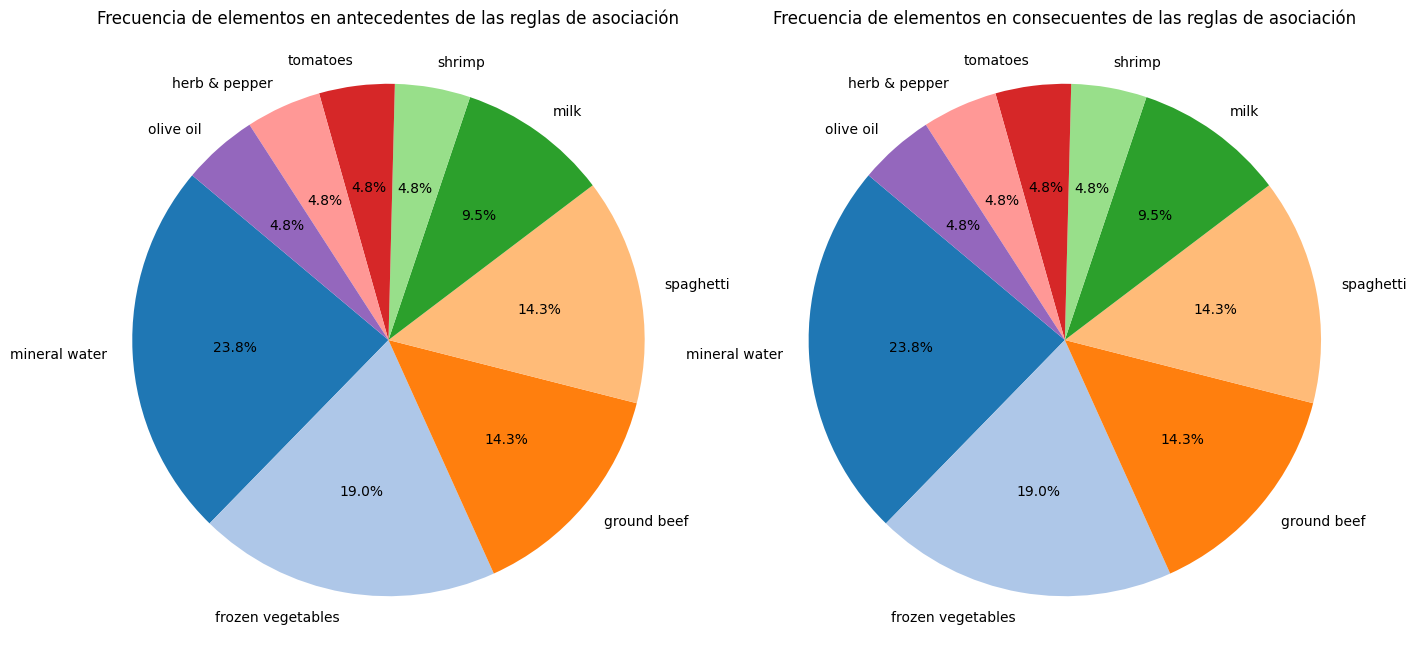

In [147]:
# Extraer antecedentes y contar su frecuencia
antecedents_counts = rules_lift['antecedents'].explode().value_counts()

# Extraer consecuentes y contar su frecuencia
consequents_counts = rules_lift['consequents'].explode().value_counts()

# Colores para las secciones del gráfico
colors = plt.cm.tab20.colors  # Colores del conjunto de colores tab20

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para antecedentes
axes[0].pie(antecedents_counts, labels=antecedents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Frecuencia de elementos en antecedentes de las reglas de asociación')
axes[0].axis('equal')

# Gráfico para consecuentes
axes[1].pie(consequents_counts, labels=consequents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Frecuencia de elementos en consecuentes de las reglas de asociación')
axes[1].axis('equal')

# Mostrar los gráficos
plt.show()

A diferencia de la clasificación con confianza (que nos daba agua mineral casi todos los consecuentes), ahora en la clasificación teniendo en cuenta el lift tenemos las mismas apariciones de los alimentos en los antecedentes que en los consecuentes. Aparecen reglas de: si compro A es más probable que compre B y si compro B es más probable que compre A.

Destacamos la presencia de agua mineral, verduras congeladas, carne picada y espaguetis en los antecedentes y consecuentes.

Obtenemos las reglas utilizando el soporte con un umbral de 0.03:

In [148]:
# Generar reglas de asociación
rules_support = association_rules(frequent_itemsets, metric="support", min_threshold=0.03)

# Imprimir las reglas generadas
print(f"\n\n -> Reglas generadas con support={0.3}:")
print(rules_support[['antecedents', 'consequents', 'support','confidence', 'lift']])



 -> Reglas generadas con support=0.3:
            antecedents          consequents   support  confidence      lift
0                (eggs)          (chocolate)  0.033196    0.184718  1.127397
1           (chocolate)               (eggs)  0.033196    0.202604  1.127397
2        (french fries)          (chocolate)  0.034395    0.201248  1.228284
3           (chocolate)       (french fries)  0.034395    0.209927  1.228284
4                (milk)          (chocolate)  0.032129    0.247942  1.513276
5           (chocolate)               (milk)  0.032129    0.196094  1.513276
6           (chocolate)      (mineral water)  0.052660    0.321400  1.348332
7       (mineral water)          (chocolate)  0.052660    0.220917  1.348332
8           (spaghetti)          (chocolate)  0.039195    0.225115  1.373952
9           (chocolate)          (spaghetti)  0.039195    0.239219  1.373952
10       (french fries)               (eggs)  0.036395    0.212949  1.184961
11               (eggs)       (frenc

El chocolate tiene una fuerte asociación con varios alimentos, como huevos, patatas fritas, leche, agua mineral y espaguetis.

Los huevos también se asocian con una serie de productos, incluyendo patatas fritas, leche, agua mineral y espaguetis.

Las patatas fritas se asocian con huevos y chocolate.

La leche está asociada con el chocolate y los huevos.

El agua mineral se asocia con chocolate, huevos, carne molida, leche, espaguetis y panqueques.

La carne molida se asocia principalmente con el agua mineral y los espaguetis.

Las asociaciones indican que el chocolate es versátil, los huevos, la leche y las patatas fritas son ingredientes básicos, la combinación de sabores dulces y salados es popular, el agua mineral se consume con comidas y la carne picada se usa principalmente en platos principales como la pasta.

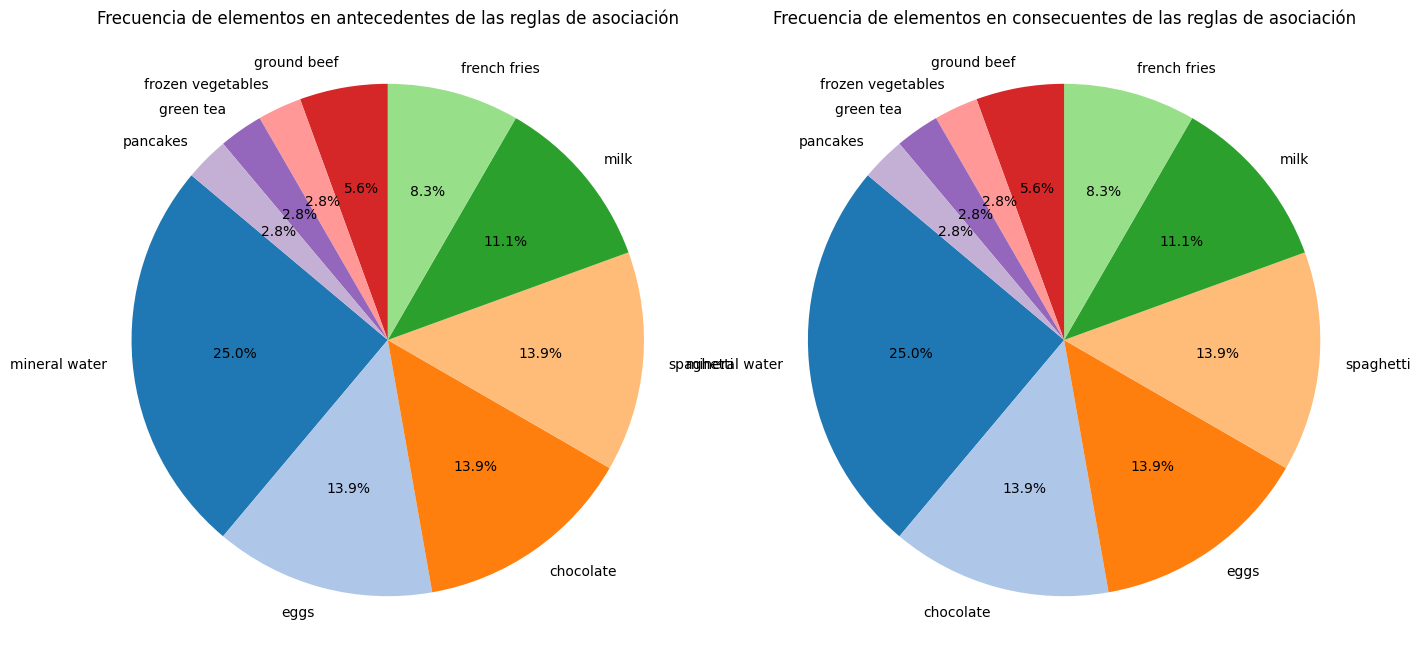

In [149]:
# Extraer antecedentes y contar su frecuencia
antecedents_counts = rules_support['antecedents'].explode().value_counts()

# Extraer consecuentes y contar su frecuencia
consequents_counts = rules_support['consequents'].explode().value_counts()

# Colores para las secciones del gráfico
colors = plt.cm.tab20.colors  # Colores del conjunto de colores tab20

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para antecedentes
axes[0].pie(antecedents_counts, labels=antecedents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Frecuencia de elementos en antecedentes de las reglas de asociación')
axes[0].axis('equal')

# Gráfico para consecuentes
axes[1].pie(consequents_counts, labels=consequents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Frecuencia de elementos en consecuentes de las reglas de asociación')
axes[1].axis('equal')

# Mostrar los gráficos
plt.show()

Como en la gráfica anterior, hay la misma presencia en los antecedentes que en los consecuentes. Destacamos el agua mineral, huevos, chocolate y espaguetis.

Obtenemos las reglas utilizando la convicción con un umbral de 1.3:

In [150]:
# Generar reglas de asociación
rules_conviction = association_rules(frequent_itemsets, metric="conviction", min_threshold=1.3)

# Imprimir las reglas generadas
print(f"\n\n -> Reglas generadas con conviction={1.3}:")
print(rules_conviction[['antecedents', 'consequents', 'support','confidence', 'lift']])



 -> Reglas generadas con conviction=1.3:
                       antecedents      consequents   support  confidence  \
0                  (herb & pepper)    (ground beef)  0.015998    0.323450   
1                    (ground beef)  (mineral water)  0.040928    0.416554   
2                    (ground beef)      (spaghetti)  0.039195    0.398915   
3                      (olive oil)  (mineral water)  0.027596    0.419028   
4                           (soup)  (mineral water)  0.023064    0.456464   
5                       (red wine)      (spaghetti)  0.010265    0.364929   
6         (ground beef, chocolate)  (mineral water)  0.010932    0.473988   
7                (milk, chocolate)  (mineral water)  0.013998    0.435685   
8              (ground beef, eggs)  (mineral water)  0.010132    0.506667   
9                     (milk, eggs)  (mineral water)  0.013065    0.424242   
10       (milk, frozen vegetables)  (mineral water)  0.011065    0.468927   
11  (frozen vegetables, spaghetti

Reglas parecidas a las del primer grupo (el de la confianza). Mientras que la confianza evalúa la probabilidad de que el consecuente ocurra dado el antecedente, la convicción evalúa la dependencia entre el antecedente y el consecuente considerando también los casos en los que el consecuente ocurre sin el antecedente.

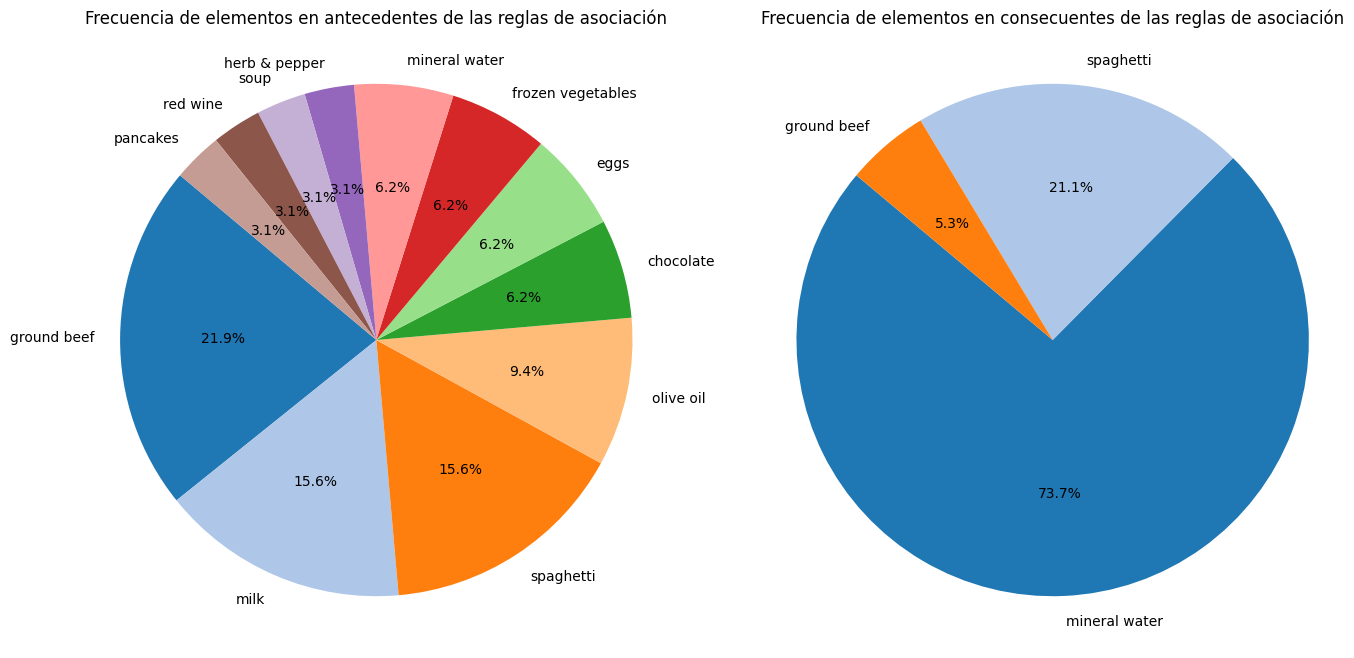

In [151]:
# Extraer antecedentes y contar su frecuencia
antecedents_counts = rules_conviction['antecedents'].explode().value_counts()

# Extraer consecuentes y contar su frecuencia
consequents_counts = rules_conviction['consequents'].explode().value_counts()

# Colores para las secciones del gráfico
colors = plt.cm.tab20.colors  # Colores del conjunto de colores tab20

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para antecedentes
axes[0].pie(antecedents_counts, labels=antecedents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Frecuencia de elementos en antecedentes de las reglas de asociación')
axes[0].axis('equal')

# Gráfico para consecuentes
axes[1].pie(consequents_counts, labels=consequents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Frecuencia de elementos en consecuentes de las reglas de asociación')
axes[1].axis('equal')

# Mostrar los gráficos
plt.show()

Destacamos la presencia en los antecedentes de carne picada, leche y espaguetis y en los consecuentes (que solo hay tres) la presencia muy elevada del agua mineral.

Obtenemos las reglas utilizando el leverage con un umbral de 0.013:

In [152]:
# Generar reglas de asociación
rules_leverage = association_rules(frequent_itemsets, metric="leverage", min_threshold=0.013)

# Imprimir las reglas generadas
print(f"\n\n -> Reglas generadas con leverage={0.013}:")
print(rules_leverage[['antecedents', 'consequents', 'support','confidence', 'lift']])



 -> Reglas generadas con leverage=0.013:
            antecedents          consequents   support  confidence      lift
0                (eggs)            (burgers)  0.028796    0.160237  1.837830
1             (burgers)               (eggs)  0.028796    0.330275  1.837830
2           (chocolate)      (mineral water)  0.052660    0.321400  1.348332
3       (mineral water)          (chocolate)  0.052660    0.220917  1.348332
4   (frozen vegetables)      (mineral water)  0.035729    0.374825  1.572463
5       (mineral water)  (frozen vegetables)  0.035729    0.149888  1.572463
6         (ground beef)      (mineral water)  0.040928    0.416554  1.747522
7       (mineral water)        (ground beef)  0.040928    0.171700  1.747522
8         (ground beef)          (spaghetti)  0.039195    0.398915  2.291162
9           (spaghetti)        (ground beef)  0.039195    0.225115  2.291162
10               (milk)      (mineral water)  0.047994    0.370370  1.553774
11      (mineral water)          

De las reglas obtenidas podemos sacar las siguientes conclusiones:

1. La compra de huevos está asociada con la compra de hamburguesas, y viceversa.

$\text{eggs} \iff \text{burgers}$

2. La compra de chocolate está asociada con la compra de agua mineral, y viceversa.

$\text{chocolate} \iff \text{mineral water}$

3. La compra de verduras congeladas está asociada con la compra de agua mineral, y viceversa.

$\text{mineral water} \iff \text{frozen vegetables}$

4. La compra de carne molida está asociada con la compra de agua mineral, y viceversa.

$\text{ground beef} \iff \text{mineral water}$

5. La compra de carne molida está asociada con la compra de espaguetis, y viceversa.

$\text{ground beef} \iff \text{spaghetti}$

6. La compra de leche está asociada con la compra de agua mineral, y viceversa.

$\text{milk} \iff \text{mineral water}$

7. La compra de agua mineral está asociada con la compra de espaguetis, y viceversa.

$\text{mineral water} \iff \text{spaghetti}$

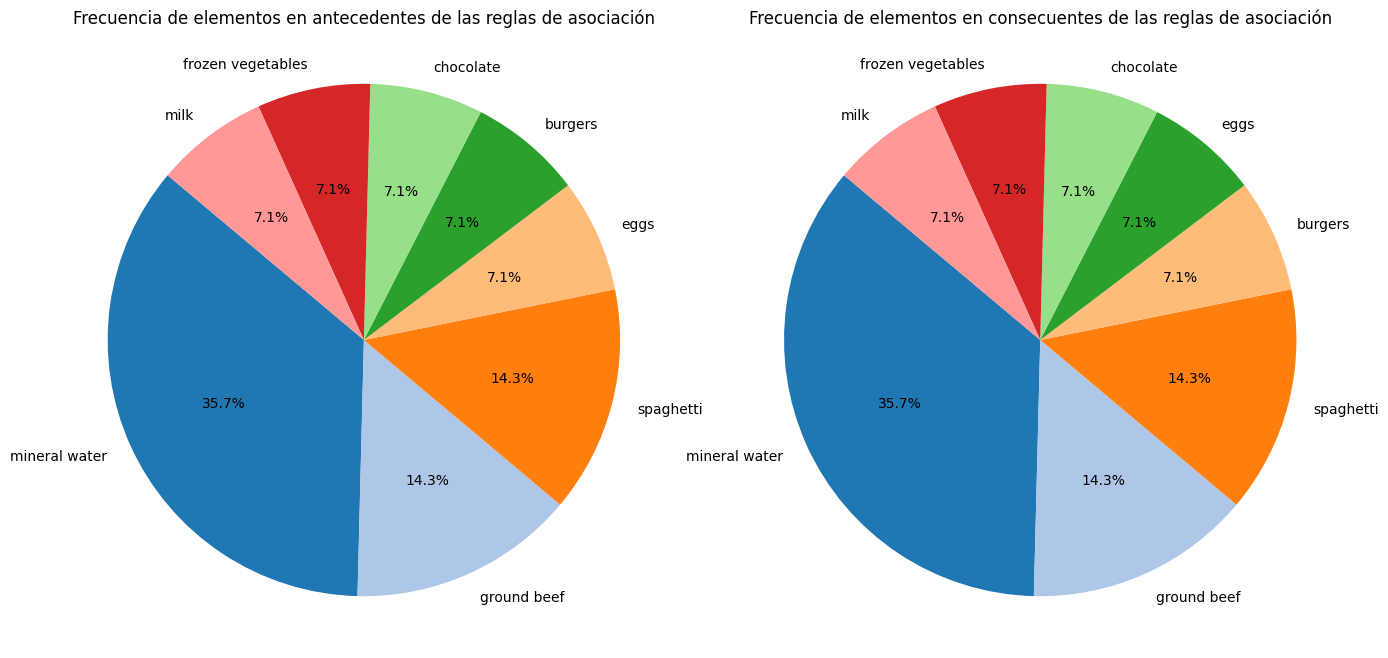

In [153]:
# Extraer antecedentes y contar su frecuencia
antecedents_counts = rules_leverage['antecedents'].explode().value_counts()

# Extraer consecuentes y contar su frecuencia
consequents_counts = rules_leverage['consequents'].explode().value_counts()

# Colores para las secciones del gráfico
colors = plt.cm.tab20.colors  # Colores del conjunto de colores tab20

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico para antecedentes
axes[0].pie(antecedents_counts, labels=antecedents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Frecuencia de elementos en antecedentes de las reglas de asociación')
axes[0].axis('equal')

# Gráfico para consecuentes
axes[1].pie(consequents_counts, labels=consequents_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Frecuencia de elementos en consecuentes de las reglas de asociación')
axes[1].axis('equal')

# Mostrar los gráficos
plt.show()

Hay la misma presencia de antecedentes que de consecuentes. Destacan el agua mineral, la carne picada y los espaguetis.

Tras haber analizado **todos los gráficos** de tarta sacamos una conclusion muy importante, y es que hay dos tipos de criterios en función de estos resultados, los que en el conseucnete tienen mucho agua o los que en el consecuente tienen lo mismo que en el antedente. Esto se debe a que las reglas que buscan mucha fiabilidad tienden a tener en el consecuente elementos muy frecuentes que hacen que sea más fácil tener esa alta confianza. Por otro lado, las métricas que buscan una alta dependencia hace que como hay dependencia, la regla se cumpla tanto en un sentido como el otro, es decir, que los items se compran juntos, y uno no es causa del otro.

Utilizando la misma gráfica anteriormente comentada en el apartado 3, que enfrenta la confianza y soporte de las reglas, se muestra todas las reglas obtenidas con cada métrica diferenciandolas con el color. Esta gráfica nos sirve para ver las diferencias entre cada métrica y también para ver la intersección entre ellas de una forma sencilla y visual.

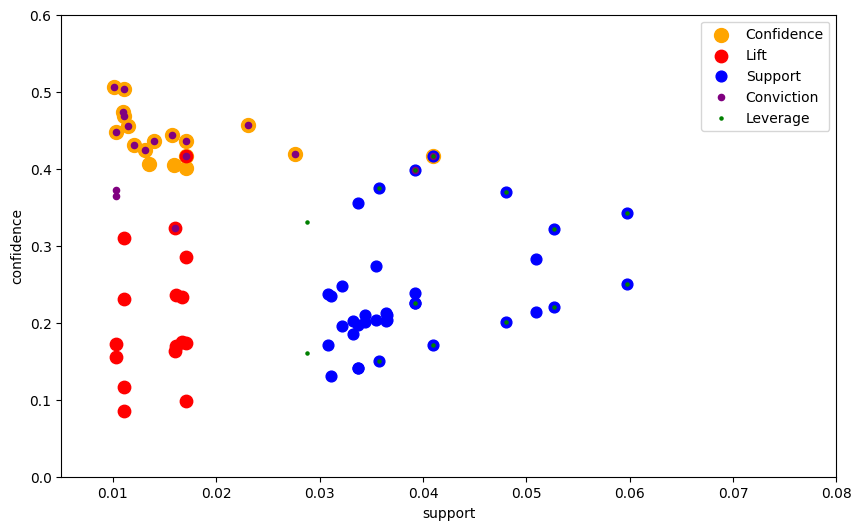

In [154]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión para cada conjunto de datos con diferentes tamaños de puntos
scatter1 = plt.scatter(rules_confidence['support'], rules_confidence['confidence'], s=100, color='orange')
scatter2 = plt.scatter(rules_lift['support'], rules_lift['confidence'], s=80, color='red')
scatter3 = plt.scatter(rules_support['support'], rules_support['confidence'], s=60, color='blue')
scatter4 = plt.scatter(rules_conviction['support'], rules_conviction['confidence'], s=20, color='purple')
scatter5 = plt.scatter(rules_leverage['support'], rules_leverage['confidence'], s=5, color='green')

plt.xlabel('support')
plt.ylabel('confidence')
plt.title("")

# Fijar los límites de los ejes x e y
plt.xlim([0.005, 0.08])
plt.ylim([0.0, 0.6])

# Leyenda
plt.legend((scatter1, scatter2, scatter3, scatter4, scatter5),
 ('Confidence', 'Lift', 'Support','Conviction', 'Leverage'))

plt.show()

Esta gráfica nos permite sacar conclusiones muy interesantes. Es importamte distinguir que cada métrica evalua cosas distintas aunque si se distinguen tres elementos fundamentales:

* La fiabilidad de la regla
* La frecuencia de la regla
* La dependencia de los items en la regla

Y en esta gráfica solo se van a tener en cuenta los dos primeros. Dicho esto las conclusiones obtenidas tras analizar la gráfica son:

En primer lugar, todas las reglas del conjunto seleccionado por lift (puntos rojos) tienen un support muy bajo (se encuentran en el intervalo 0.01-0.02). Esto se debe a que el conjunto, que ha sido seleccionado por lift con un umbral de 2.35 tiene unas asociaaciones específicas entre ciertos alimentos que es significativa pero poco común entre las compras realizadas. Recordamos que el lift es cuánto más probable es que ocurra Y dado que ocurrió X, en comparación con si fueran eventos independientes. Es por lo tanto, que este grupo tiene una asociación significativa pero poco frecuente en las compras, lo que puede deberse a preferencias o hábitos alimenticios específicos de ciertos grupos de clientes.

En segundo lugar, si se tiene tanto un alto Lift como una alta convicción, se está observando una fuerte relación entre X e Y, donde la ocurrencia de X no solo aumenta significativamente la probabilidad de Y, sino que también X es un indicador confiable de la ocurrencia de Y. Esto implica que los dos eventos están muy interrelacionados y pueden influenciarse mutuamente de manera significativa. Esto se puede ver en dos intersecciones entre los grupos lif y conviction, tienen un soporte muy bajo pero una confianza superior a 0.3.

En tercer lugar, lógicamente, se pueden distinguir los puntos amarillos y azules en el gráfico, puesto que el conjunto confidence tiene una confianza elevada y el grupo support tiene un soporte alto. Solo hay una intersección (que se calculará más adelante), una relación sólida y ampliamente aceptada entre los elementos X e Y. Esto implica que no solo la ocurrencia de Y es probable cuando ocurre X, sino que también esta asociación es muy común en el conjunto de datos.

En cuarto lugar, la mayoría de las intersecciones del conjunto de alta confianza son con el conjunto de alta convicción. Recordamos que La convicción mide la fuerza de la implicación entre dos elementos en un conjunto de datos y se calcula como 1−confianza. Por lo tanto, una alta convicción implica que la relación entre X e Y es muy fuerte y se sostiene incluso si invertimos el orden de los elementos. Es decir, si X implica fuertemente a Y, entonces la convicción será alta. Cuando tanto la confianza como la convicción son altas, se está observando una asociación robusta y altamente significativa entre los elementos X e Y. Esto implica que no solo la ocurrencia de Y es probable cuando ocurre X, sino que también esta asociación es muy fuerte y se mantiene independientemente del orden en el que ocurran los eventos.

Por último, todas las intersecciones del grupo leverage son con el conjunto support. Una de estas intersecciones sucede cuando hay una relación fuerte y generalizada entre los elementos. Esto significa que la presencia de un elemento tiene un impacto significativo en la ocurrencia del otro, y esta asociación es comúnmente observada en el conjunto de datos.

Para comprobar esto y analizarlo más en detalle se va a explicar las intersecciones entre estas métrcias en los casos que se han considerado interesantes.

In [155]:
# Calcular la intersección
columnsas = ['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric']

interseccion_conf_sup = pd.merge(rules_confidence, rules_support, how='inner',
                        on=columnsas)
print(" -> Confidence y support: ")
print(interseccion_conf_sup)

 -> Confidence y support: 
     antecedents      consequents  antecedent support  consequent support  \
0  (ground beef)  (mineral water)            0.098254            0.238368   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.040928    0.416554  1.747522  0.017507    1.305401       0.474369  


Analizando la regla obtenida en la intersección de alta confianza y alto soporte obtenemos:

1. **Regla 1 (Ground Beef -> Mineral Water)**:  Esta regla sugiere que los clientes que compran ground beef también tienden a comprar agua mineral.
   - El **support** para el itemset **{ground beef}** es del **9.83%**.
   - La **confianza** de la regla es del **41.66%**, lo que significa que el **41.66%** de las transacciones que contienen **ground beef** también contienen **mineral water**.
   - El **lift** es de **1.75**, lo que indica que la probabilidad de comprar **mineral water** aumenta **1.75 veces** cuando se compra **ground beef**.
   - El **leverage** es **0.0175**, lo que sugiere una relación positiva entre **ground beef** y **mineral water**.
   - El **conviction** es **1.31**, lo que implica que la compra de **ground beef** no está fuertemente influenciada por la presencia de **mineral water**.

En resumen, esta regla indica que hay una asociación positiva entre **ground beef** y **mineral water** en el supermercado, es decir, os clientes que compran **ground beef** también tienden a comprar **mineral water**. Sin embargo, la fuerza de esta asociación no es muy alta, ya que la confianza y el lift no son valores extremadamente altos.

In [156]:
interseccion_conf_conv = pd.merge(rules_confidence, rules_conviction, how='inner',
                        on=columnsas)
print(" -> Confidence y conviction: ")
print(interseccion_conf_conv)

 -> Confidence y conviction: 
                       antecedents      consequents  antecedent support  \
0                    (ground beef)  (mineral water)            0.098254   
1                      (olive oil)  (mineral water)            0.065858   
2                           (soup)  (mineral water)            0.050527   
3         (ground beef, chocolate)  (mineral water)            0.023064   
4                (milk, chocolate)  (mineral water)            0.032129   
5              (ground beef, eggs)  (mineral water)            0.019997   
6                     (milk, eggs)  (mineral water)            0.030796   
7        (milk, frozen vegetables)  (mineral water)            0.023597   
8   (frozen vegetables, spaghetti)  (mineral water)            0.027863   
9              (milk, ground beef)  (mineral water)            0.021997   
10        (ground beef, spaghetti)  (mineral water)            0.039195   
11    (ground beef, mineral water)      (spaghetti)            0.04092

Las **14 reglas** que se encuentran tienen una alta confianza y alta convicción, y eso parece cuasar que el consecuente sea el **agua (mineral water)**. Esto se debe a que el algoritmo de asociación tiende a encontrar patrones fuertes entre los elementos más frecuentes, especialmente con estas dos métricas. Dado que **mineral water** es un artículo común en las transacciones, es natural que aparezca en muchas de estas reglas.

En resumen, la alta confianza y convicción en estas reglas está influenciada por la frecuencia de **mineral water** en las compras de los clientes. Si un cliente compra:

1. **Ground Beef (Carne picada)**
2. **Olive Oil (Aceite de oliva)**
3. **Soup (Sopa)**
4. **Chocolate y Ground Beef (Carne picada)**
5. **Chocolate y Milk (Leche)**
6. **Eggs y Ground Beef (Carne picada)**
7. **Eggs y Milk (Leche)**
8. **Milk y Frozen Vegetables (Vegetales congelados)**
9. **Frozen Vegetables (Vegetales congelados) y Spaghetti**
10. **Ground Beef (Carne picada) y Milk (Leche)**
12. **Ground Beef (Carne picada) y Spaghetti**
13. **Milk (Leche) y Spaghetti**
14. **Olive Oil (Aceite de oliva) y Spaghetti**
15. **Pancakes y Spaghetti**

Entonces es probable que también compre **mineral water** debido a esta asociación frecuente.

In [157]:
interseccion_lift_conv = pd.merge(rules_lift, rules_conviction, how='inner',
                        on=columnsas)
print(" -> Lift y conviction: ")
print(interseccion_lift_conv)

 -> Lift y conviction: 
                    antecedents    consequents  antecedent support  \
0               (herb & pepper)  (ground beef)            0.049460   
1  (ground beef, mineral water)    (spaghetti)            0.040928   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.098254  0.015998    0.323450  3.291994  0.011138     1.33286   
1            0.174110  0.017064    0.416938  2.394681  0.009938     1.41647   

   zhangs_metric  
0       0.732460  
1       0.607262  


Analizando la regla obtenida en la intersección de alto lift y alta convicción obtenemos:

1. **Regla 1: (herb & pepper) -> (ground beef)**:  Esta regla sugiere que los clientes que compran hierbas y pimienta también tienden a comprar carne picada.
   - El **soporte** para el conjunto de ítems **{herb & pepper}** es del **1.5998%**.
   - La **confianza** de la regla es del **32.345%**, lo que significa que el **32.345%** de las transacciones que contienen **herb & pepper** también contienen **ground beef**.
   - El **lift** es de **3.29**, lo que indica que la probabilidad de comprar **ground beef** aumenta **3.29 veces** cuando se compra **herb & pepper**.
   - La métrica de Zhang de **0.732460** indica una correlación positiva fuerte entre estos elementos.

2. **Regla 2: (ground beef, mineral water) -> (spaghetti)**: Esta regla sugiere que los clientes que compran carne picada y agua mineral también tienden a comprar espaguetis.
   - El **soporte** para el conjunto de ítems **{ground beef, mineral water}** es del **1.7064%**.
   - La **confianza** de la regla es del **41.6938%**, lo que significa que el **41.6938%** de las transacciones que contienen **ground beef y mineral water** también contienen **spaghetti**.
   - El **lift** es de **2.39**, lo que indica que la probabilidad de comprar **spaghetti** aumenta **2.39 veces** cuando se compran **ground beef y mineral water**.
   - La métrica de Zhang de **0.607262** indica una correlación positiva moderada entre estos elementos.

## 5.- (1 punto)

Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?

Ahora juntamos las reglas que hemos obtenido con todas las métricas en un mismo dataframe para poder compararlas todas juntas y ver las diferencias entre la métricas.

In [158]:
import pandas as pd

# Unir todos los conjuntos de datos
all_rules = pd.concat([rules_confidence, rules_lift, rules_support, rules_conviction, rules_leverage])

# Eliminar las reglas duplicadas
all_rules_unique = all_rules.drop_duplicates()

# Restablecer el índice de all_rules_unique
all_rules_unique = all_rules_unique.reset_index(drop=True)
print(all_rules_unique)

                   antecedents      consequents  antecedent support  \
0                (ground beef)  (mineral water)            0.098254   
1                  (olive oil)  (mineral water)            0.065858   
2                     (salmon)  (mineral water)            0.042528   
3                       (soup)  (mineral water)            0.050527   
4            (eggs, chocolate)  (mineral water)            0.033196   
..                         ...              ...                 ...   
67             (mineral water)      (spaghetti)            0.238368   
68                  (red wine)      (spaghetti)            0.028130   
69  (olive oil, mineral water)      (spaghetti)            0.027596   
70                      (eggs)        (burgers)            0.179709   
71                   (burgers)           (eggs)            0.087188   

    consequent support   support  confidence      lift  leverage  conviction  \
0             0.238368  0.040928    0.416554  1.747522  0.017507   

De las 72 reglas que tenemos, ahora definimos dos criterios para seleccionar las reglas más destacables y filtrar de las 72 las que son más prometedoras.

El **criterio 1** es más exigente en términos de confianza y lift, mientras que el criterio 2 es más exigente en términos de soporte y leverage. Si se prioriza una asociación más fuerte y confiable entre los elementos, el criterio 1 es preferible. Para que una regla sea considerada bajo este criterio, debe tener una confianza mayor al 40%, un lift mayor a 1.9, un soporte mayor al 1%, y un leverage mayor a 0.005.

In [159]:
# Definir un criterio para seleccionar las mejores reglas
criterio1 = ((all_rules_unique['confidence'] > 0.4) &
            (all_rules_unique['lift'] > 1.9) &
            (all_rules_unique['support'] > 0.01) &
            (all_rules_unique['leverage'] > 0.005))

# Aplicar el criterio para seleccionar las mejores reglas
print(all_rules_unique[criterio1])

                     antecedents      consequents  antecedent support  \
3                         (soup)  (mineral water)            0.050527   
5       (ground beef, chocolate)  (mineral water)            0.023064   
8            (ground beef, eggs)  (mineral water)            0.019997   
10     (milk, frozen vegetables)  (mineral water)            0.023597   
12           (milk, ground beef)  (mineral water)            0.021997   
14  (ground beef, mineral water)      (spaghetti)            0.040928   
17         (spaghetti, pancakes)  (mineral water)            0.025197   

    consequent support   support  confidence      lift  leverage  conviction  \
3             0.238368  0.023064    0.456464  1.914955  0.011020    1.401255   
5             0.238368  0.010932    0.473988  1.988472  0.005434    1.447937   
8             0.238368  0.010132    0.506667  2.125563  0.005365    1.543848   
10            0.238368  0.011065    0.468927  1.967236  0.005440    1.434136   
12            0

Seis de las siete reglas tienen como consecuente el agua mineral. A simple vista la que más llama la atención es la 5 (chocolate y ground beef implican mineral water), ya que es una regla que difícilmente una persona pensaría. Parece raro relacionar estos tres elementos, sin embargo tiene mucho sentido. La única regla que no tiene agua mineral como consecuente, la tiene como antecedente, la 13 (ground beef y mineral water implican spaghetti). Esta última tiene mucho más sentido.             

El **criterio 2** prioriza reglas con un soporte y leverage más altos, exigiendo que al menos el 4% de todas las transacciones contengan tanto el antecedente como el consecuente de la regla, y que exista una relación positiva entre estos elementos. Este criterio es más apropiado si se busca una mayor aplicabilidad de las reglas en un conjunto más amplio de transacciones, aunque la asociación entre los elementos puede no ser tan fuerte y confiable como en el criterio 1.

In [160]:
# Definir un criterio para seleccionar las mejores reglas
criterio2 = ((all_rules_unique['confidence'] > 0.15) &
                        (all_rules_unique['lift'] > 1.4) &
                        (all_rules_unique['support'] > 0.04) &
                        (all_rules_unique['leverage'] > 0.017))

# Aplicar el criterio para seleccionar las mejores reglas
print(all_rules_unique[criterio2])

        antecedents      consequents  antecedent support  consequent support  \
0     (ground beef)  (mineral water)            0.098254            0.238368   
57  (mineral water)    (ground beef)            0.238368            0.098254   
60           (milk)  (mineral water)            0.129583            0.238368   
61  (mineral water)           (milk)            0.238368            0.129583   
66      (spaghetti)  (mineral water)            0.174110            0.238368   
67  (mineral water)      (spaghetti)            0.238368            0.174110   

     support  confidence      lift  leverage  conviction  zhangs_metric  
0   0.040928    0.416554  1.747522  0.017507    1.305401       0.474369  
57  0.040928    0.171700  1.747522  0.017507    1.088672       0.561638  
60  0.047994    0.370370  1.553774  0.017105    1.209650       0.409465  
61  0.047994    0.201342  1.553774  0.017105    1.089850       0.467950  
66  0.059725    0.343032  1.439085  0.018223    1.159314       0.3694

De estas 6 reglas todas tienen agua mineral, 3 en los antecedentes y 3 en los consecuentes. De hecho se relaciona el agua con la leche, la carne picada y los espaguetis, en ambos sentidos.

$$\text{mineral water} \iff \text{ground beef}$$
$$\text{mineral water} \iff \text{milk}$$
$$\text{mineral water} \iff \text{spaghetti}$$

Por último vamos a estudiar las reglas que contienen un antecesor que hemos considerado interesante. Esto es algo muy relevante, puesto que se pueden ver todas las relaciones, es decir, todas las reglas que se obtienen dado un alimento.

In [161]:
# Filtrar reglas que contienen 'chocolate' como antecedente
chocolate_rules = all_rules_unique[all_rules_unique['antecedents'].apply(lambda x: 'chocolate' in x)]

# Imprimir las reglas encontradas
print(chocolate_rules)

                 antecedents      consequents  antecedent support  \
4          (eggs, chocolate)  (mineral water)            0.033196   
5   (ground beef, chocolate)  (mineral water)            0.023064   
6          (milk, chocolate)  (mineral water)            0.032129   
7     (spaghetti, chocolate)  (mineral water)            0.039195   
34               (chocolate)           (eggs)            0.163845   
36               (chocolate)   (french fries)            0.163845   
38               (chocolate)           (milk)            0.163845   
39               (chocolate)  (mineral water)            0.163845   
42               (chocolate)      (spaghetti)            0.163845   

    consequent support   support  confidence      lift  leverage  conviction  \
4             0.238368  0.013465    0.405622  1.701663  0.005552    1.281394   
5             0.238368  0.010932    0.473988  1.988472  0.005434    1.447937   
6             0.238368  0.013998    0.435685  1.827780  0.006340    1

Estas reglas llaman mucho la atención, puesto que se relaciona el chocolate con los huevos, los espaguetis y las patatas fritas.

La combinación de "chocolate" con "eggs" o "ground beef" puede indicar recetas específicas que requieren estos ingredientes juntos, como pasteles de chocolate con huevos o salsas de chocolate para acompañar la carne.

La asociación de "chocolate" con "milk" podría deberse al hecho de que el chocolate a menudo se consume con leche, ya sea como bebida o en forma de productos lácteos con sabor a chocolate.

La asociación de "chocolate" con "mineral water" podría indicar que estos son productos básicos que los clientes tienden a comprar juntos durante sus compras habituales.

La asociación de "chocolate" con "spaghetti" podría parecer sorprendente a primera vista, pero puede reflejar patrones de compra donde los clientes que compran ingredientes para una cena especial también agregan un postre de chocolate a su compra.

Snacks: La asociación de "chocolate" con "french fries" puede indicar una combinación de productos que los clientes disfrutan como parte de su experiencia de compra, posiblemente como opciones para complementar sus comidas o como tentempiés durante el día.

In [162]:
# Filtrar reglas que contienen 'burguer' como antecedente
vegetables_rules = all_rules_unique[all_rules_unique['antecedents'].apply(lambda x: 'frozen vegetables' in x)]

# Imprimir las reglas encontradas
print(vegetables_rules)

                           antecedents            consequents  \
10           (milk, frozen vegetables)        (mineral water)   
11      (frozen vegetables, spaghetti)        (mineral water)   
19                 (frozen vegetables)               (shrimp)   
20                 (frozen vegetables)             (tomatoes)   
25  (frozen vegetables, mineral water)                 (milk)   
27                 (frozen vegetables)  (milk, mineral water)   
53                 (frozen vegetables)        (mineral water)   

    antecedent support  consequent support   support  confidence      lift  \
10            0.023597            0.238368  0.011065    0.468927  1.967236   
11            0.027863            0.238368  0.011998    0.430622  1.806541   
19            0.095321            0.071457  0.016664    0.174825  2.446574   
20            0.095321            0.068391  0.016131    0.169231  2.474464   
25            0.035729            0.129583  0.011065    0.309701  2.389991   
27         

Estas reglas proporcionan información valiosa sobre las relaciones entre los productos y los patrones de compra de los clientes, lo que puede ser útil para la planificación de inventario, la disposición de la tienda, la segmentación de clientes y la personalización de ofertas y promociones.


**Complementariedad de productos:**

Los productos en los antecedentes y consecuentes de estas reglas pueden ser naturalmente complementarios en términos de uso o consumo. Por ejemplo, la compra de verduras congeladas y gambas puede ser común porque son ingredientes comunes en una variedad de platos de mariscos o platos de cocina internacional.

**Hábitos de compra:**

Los patrones de compra de los clientes pueden influir en estas asociaciones. Por ejemplo, si los clientes suelen comprar leche y verduras congeladas juntos para abastecerse de productos básicos de la despensa, es probable que también agreguen otros artículos comunes a su carrito, como agua mineral.

**Ofertas y promociones:**

Las estrategias de venta y las promociones pueden influir en estas asociaciones. Por ejemplo, si hay una promoción que ofrece agua mineral a un precio especial cuando se compran verduras congeladas y espaguetis juntos, es probable que veamos una mayor asociación entre estos productos en las transacciones.

**Preferencias culturales o estacionales:**

Los productos que se compran juntos pueden reflejar preferencias culturales o estacionales. Por ejemplo, ciertos ingredientes pueden ser más populares en determinadas épocas del año debido a las temporadas de cultivo o a festividades específicas.





# Práctica 2 (Patrones Secuenciales)
Valor (5 puntos)

El conjunto de datos “Online Retail.xlsx” contiene productos (definidos por la columna StockCode y Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes momentos (definidos por el campo InvoiceDate).

1.- (2 puntos) Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes.

Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la librería gsppy.

2.- (1 punto) Prueba al menos dos configuraciones de soporte diferentes.

3.- (1 puntos) Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos.

4.- (1 punto) Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza tengan.

Librería gsppy:
Podéis encontrar su documentación en el siguiente enlace: https://pypi.org/project/gsppy/

## 1.- (2 puntos)

Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes.

Cargamos la base de datos con la que vamos a trabajar. Por comodidad, se ha decidido subirla a Google Drive y cargarla desde ahí:

In [163]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [164]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)
directorio_drive = '/content/drive/MyDrive/Colab/Online Retail.xlsx'

# Carga el archivo Excel en un DataFrame.
data = pd.read_excel(directorio_drive)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se crea una copia del dataset para no perder los datos originales:

In [165]:
df = data.copy()

Representamos los datos para ver su formato.

In [166]:
# Visualización de los datos.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


La base de datos representan características de pedidos de clientes en la que se incluyen el tipo de pedido, la cantidad del mismo, el precio por unidad y de qué país es el cliente.

In [167]:
# Dimensiones de la base de datos.
df.shape

(541909, 8)

En la base de datos hay más de medio millón de registros, 541909, en cada uno de ellos se guardan 8 características.

In [168]:
# Características de cada pedido.
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


* InvoiceNo: Número de factura de la transacción realizada. Variable importante debido a que nos sirve como un identificador del tiempo.

* StockCode: Identificador del producto.

* Description: descripción del producto.

* Quantity: cantidad de productos "StockCode" que el cliente ha comprado.

* InvoiceDate: Fecha en la que se ha realizado la transacción. También es un indicador del tiempo, pero es mejor 'InvoiceNo'.

* UnitPrice: Valor de una unidad del producto identificado por "StockCode".

* CustomerID: Identificador del cliente. Variable importante debido a que nos va a permitir agrupar todas las transacciones por cliente.

* Country: País donde se envían los productos comprados en la transacción.

In [169]:
paises = df.loc[:,'Country'].unique().tolist()

# Paises en la base de datos
print(paises)
# Cantidad de paises
print("Nº de países:",len(paises))

['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Malta', 'RSA']
Nº de países: 38


Hay registros de pedidos en 38 países distintos.

Se procede a analizar el tipo de variable que guarda cada columna y si exite algún Nan en alguna de ellas.

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


Se puede ver que sólo en la variable Description existen Nan, veamos si con el StockCode podemos determinar qué productos son haciendo uso de información de otros datos que puedan tener el mismo StockCode.

Así, se va a intentar rellenar las descripciones que tienen Nan utilizando otros registros con el mismo 'StockCode' que sí tengan descripción.

Antes de realizar esta tarea de recuperación de información, se ha considerado que hay valores de 'UnitPrice' y 'Quantity' erróneos, estos son aquellos que sean menores o iguales que cero. Antes de tomar decisiones, veamos datos estadísticos de estas variables y visualizemos sus distribuciones con boxplots:

In [171]:
print(df.describe().loc[['mean', 'std', 'min','50%', 'max']])

          Quantity     UnitPrice    CustomerID
mean      9.552250      4.611114  15287.518434
std     218.081158     96.759853   1484.746041
min  -80995.000000 -11062.060000  12346.000000
50%       3.000000      2.080000  15287.000000
max   80995.000000  38970.000000  18287.000000


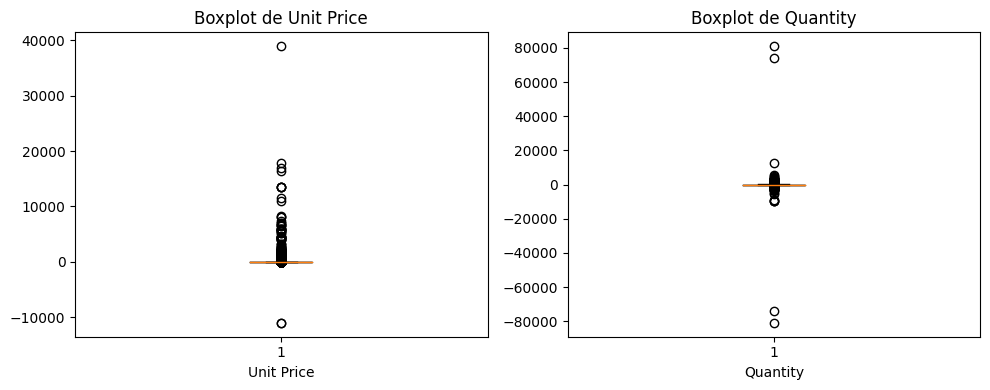

In [172]:
# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Crear boxplot para UnitPrice
axes[0].boxplot(df['UnitPrice'])
axes[0].set_title('Boxplot de Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('')

# Crear boxplot para Quantity
axes[1].boxplot(df['Quantity'])
axes[1].set_title('Boxplot de Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Como se puede observar, hay una gran cantidad de outliers en ambas variables. En principio, lo que más sentido tiene es solo eliminar aquellos valores que sean <= que 0. Y aunque podría tener sentido que alguien compre una gran cantidad de productos (como 80000) o que un producto tenga un valor muy alto (como 40000), se entiende que al ser matemáticamente outliers, están muy alejados de la distribución real de cada variable y por lo tanto, se decide eliminar también a los outliers de las zonas superiores. Aun así, veamos qué porción del dataset forman los outliers:

In [173]:
# Función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)].copy()  # Utilizar copy()
    outliers['Outlier_Variable'] = variable  # Agregar el nuevo campo
    return outliers

variables_interes = ['UnitPrice', 'Quantity']
for variable in variables_interes:
    outliers = detectar_outliers(df, variable)
    print(f"Outliers en {variable.upper()}:")
    print("Tamaño: ", outliers[variable].shape)
    print("\nDatos estadísticos:")
    print(outliers[variable].describe())
    print()

Outliers en UNITPRICE:
Tamaño:  (39627,)

Datos estadísticos:
count    39627.000000
mean        31.084752
std        356.699161
min     -11062.060000
25%          9.950000
50%         11.630000
75%         15.790000
max      38970.000000
Name: UnitPrice, dtype: float64

Outliers en QUANTITY:
Tamaño:  (58619,)

Datos estadísticos:
count    58619.000000
mean        50.590969
std        661.524902
min     -80995.000000
25%         24.000000
50%         25.000000
75%         48.000000
max      80995.000000
Name: Quantity, dtype: float64



Los outliers son una gran cantidad de datos (39627 registros en UnitPrice y 58619 en Quantity), y aunque formen una muestra significativa de los datos, debido a cuestiones de tiempo de computación (tantos datos podrían ralentizar la ejecución de GSP), se decide eliminar todos los outliers (forzando la eliminación de valores <= que 0).

In [174]:
def eliminar_outliers(data, variables):
  # Crear una copia del DataFrame para evitar modificar el original
  data_no_outliers = data.copy()
  lower_bound = []
  upper_bound = []
  for variable in variables:
    Q1 = data_no_outliers[variable].quantile(0.25)
    Q3 = data_no_outliers[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound.append(Q1 - 1.5 * IQR)
    upper_bound.append(Q3 + 1.5 * IQR)

  for i in range(len(variables)):
    # Filtrar los outliers y mantener solo los valores dentro del rango
    data_no_outliers = data_no_outliers[(data_no_outliers[variables[i]] >= lower_bound[i]) & (data_no_outliers[variables[i]] <= upper_bound[i])]
    data_no_outliers = data_no_outliers[(data_no_outliers[variables[i]] > 0)]

  return data_no_outliers

variables_interes = ['UnitPrice', 'Quantity']
df = eliminar_outliers(df, variables_interes)

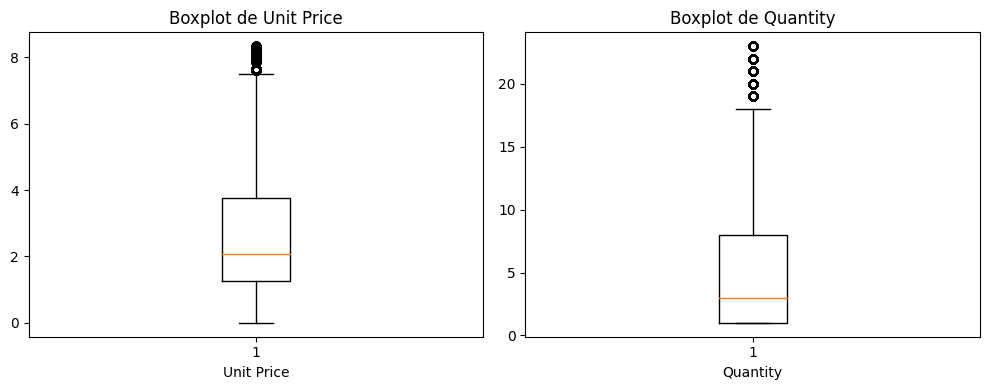

In [175]:
# Verificar los cambios
# Crear subplots para cada variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Crear boxplot para UnitPrice
axes[0].boxplot(df['UnitPrice'])
axes[0].set_title('Boxplot de Unit Price')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('')

# Crear boxplot para Quantity
axes[1].boxplot(df['Quantity'])
axes[1].set_title('Boxplot de Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# variables_interes = ['UnitPrice', 'Quantity']
# for variable in variables_interes:
#     outliers = detectar_outliers(df, variable)
#     print(f"\nOUTLIERS EN '{variable}':")
#     print("Tamaño:",outliers[variable].shape,"\n")
#     print("Datos estadísticos:")
#     print(outliers[variable].describe())

In [176]:
print("Nuevo tamaño del dataset: ", df.shape)

Nuevo tamaño del dataset:  (436166, 8)


Ahora, se procede a lo mencionado anteriormente: intentar rellenar las descripciones que tienen Nan utilizando otros registros con el mismo 'StockCode' que sí tengan descripción. Veamos cuántos Nan nos quedan tras la depuración:

In [177]:
print(df[pd.isna(df['Description'])].shape)

(0, 8)


No obstante, se observa que al realizar la depuración de las variables 'UnitPrice' y 'Quantity' se han borrado también todos los registros que tenían Nan en 'Description'.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436166 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    436166 non-null  object        
 1   StockCode    436166 non-null  object        
 2   Description  436166 non-null  object        
 3   Quantity     436166 non-null  int64         
 4   InvoiceDate  436166 non-null  datetime64[ns]
 5   UnitPrice    436166 non-null  float64       
 6   CustomerID   436166 non-null  int64         
 7   Country      436166 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 29.9+ MB


Antes de proceder a la construcción de la base de datos en el formato necesario, se hacen unas últimas comprobaciones de que nuestros datos no contienen ninguna anomalía:

In [179]:
print(df.nunique())

InvoiceNo      17875
StockCode       3656
Description     3750
Quantity          23
InvoiceDate    16679
UnitPrice        278
CustomerID      4165
Country           38
dtype: int64


In [180]:
print(df.duplicated().sum())#HAY FILAS DUPLICADAS

4944


In [181]:
duplicated_rows = df[df.duplicated(keep=False)]
sorted_rows = duplicated_rows.sort_values(by=df.columns.tolist())
sorted_rows[['InvoiceNo', 'StockCode', 'Description', 'Quantity']].head()

,InvoiceNo,StockCode,Description,Quantity
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1


Se detectan filas duplicadas. Para evitar la redundancia y solo contar con registros únicos, se eliminan:

In [182]:
df = df.drop_duplicates()

In [183]:
print("Nuevo tamaño del dataset: ", df.shape)

Nuevo tamaño del dataset:  (431222, 8)


Tras una primera fase de depuración de datos, se procede a la construcción de la base de datos en el formato necesario para aplicar el algoritmo GSP, que es una lista de listas en la que cada sublista representa un cliente. Luego cada cliente debería ser una lista de listas también, en la que cada sublista representa una transacción (con las transacciones ordenadas por el momento de tiempo).

Para ello:

1. Se ordena el dataframe en función de 'InvoiceNo' (indicador del tiempo):

In [184]:
gsp_df = pd.DataFrame(df.sort_values('InvoiceNo')) #En cada paso, creamos un dataframe.
gsp_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


2. Se agrupa el dataframe en función de 'InvoiceNo' y 'CustomerID', aplicando el método 'agg(list).reset_index()', el cual nos permite convertir cada transacción (dada por 'InvoiceNo') en una lista. Y se elimina la columna 'InvoiceNo':

In [185]:
gsp_df = pd.DataFrame(df.groupby(['InvoiceNo', 'CustomerID'])['StockCode'].agg(list).reset_index())
gsp_df = gsp_df.drop(columns=['InvoiceNo'])
gsp_df.head()

,CustomerID,StockCode
0,17850,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
1,17850,"[22633, 22632]"
2,13047,"[22745, 22748, 22749, 22310, 84969, 22623, 217..."
3,13047,"[22960, 22913, 22912, 22914]"
4,13047,[21756]


3. Mediante 'gsp_df['StockCode'].apply(lambda x: [str(item) for item in x]' se convierte cada 'StockCode' (indicador del producto comprado) en cadenas de caracteres para evitar errores por mezcla de tipos de dato:

In [186]:
gsp_df['StockCode'] = gsp_df['StockCode'].apply(lambda x: [str(item) for item in x])
gsp_df.head()

,CustomerID,StockCode
0,17850,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
1,17850,"[22633, 22632]"
2,13047,"[22745, 22748, 22749, 22310, 84969, 22623, 217..."
3,13047,"[22960, 22913, 22912, 22914]"
4,13047,[21756]


4. De nuevo, se realiza una agrupación, esta vez en función de 'CustomerID'. Y se vuelve a aplicar el método 'agg(list).reset_index()' consiguiendo que cada cliente sea una lista de listas:

In [187]:
gsp_df = pd.DataFrame(gsp_df.groupby(['CustomerID'])['StockCode'].agg(list).reset_index())
gsp_df.head()

,CustomerID,StockCode
0,12347,"[[85116, 22375, 71477, 22771, 22772, 22773, 22..."
1,12348,[[22437]]
2,12349,"[[23112, 21564, 21411, 21563, 22131, 22195, 48..."
3,12350,"[[21908, 22412, 79066K, 79191C, 84086C, 22551,..."
4,12352,"[[21380, 22064, 21232, 22646, 22779, 22654, 21..."


In [188]:
print("Todas las transacciones del cliente 5:", gsp_df.loc[5, 'StockCode'])

Todas las transacciones del cliente 5: [['37446', '37450']]


5. Eliminamos todos aquellos clientes que contengan una sola transacción de un solo producto. Esto es porque estos clientes no aportan información significativa a la hora de obtener patrones frecuentes debido a que han realizado una sola compra de un solo producto (no se puede obtener consecuente):

In [189]:
gsp_df = gsp_df[(gsp_df['StockCode'].map(len) > 1) | (gsp_df['StockCode'].map(lambda x: len(x[0]) > 1))]
gsp_df.head()

,CustomerID,StockCode
0,12347,"[[85116, 22375, 71477, 22771, 22772, 22773, 22..."
2,12349,"[[23112, 21564, 21411, 21563, 22131, 22195, 48..."
3,12350,"[[21908, 22412, 79066K, 79191C, 84086C, 22551,..."
4,12352,"[[21380, 22064, 21232, 22646, 22779, 22654, 21..."
5,12353,"[[37446, 37450]]"


6. Por último, convertimos la columna de productos en una lista que esta ordenada en el tiempo y por cliente consiguiendo el formato requerido:

In [190]:
gsp_list = gsp_df['StockCode'].tolist()

Verificamos que está bien mirando si el tamaño de la lista creada coincide con el nº de clientes:

In [191]:
print("Clientes únicos: ", len(gsp_df['CustomerID'].unique()))

print("Tamaño de la lista: ", len(gsp_list)) #La lista tiene la misma longitud que el nº total de clientes

Clientes únicos:  4090
Tamaño de la lista:  4090


Se procede a instalar la librería propuesta para aplicar GSP:

In [192]:
!pip install gsppy

In [193]:
from gsppy.gsp import GSP

In [194]:
gsp_object = GSP(gsp_list)

TypeError: unhashable type: 'list'

Observamos que hay un error al crear el objeto de la clase GSP con el error:

**TypeError: unhashable type: 'list'**

Tras revisar la documentación de la libería, se observa que el formato que esta librería requiere es una lista de listas, donde cada sublista representa una transacción. Esto choca con el formato que nosotros necesitamos, que es lista de listas de listas (lista de clientes, y cada cliente lista de transacciones; 3 niveles de profundidad). Veamos como funciona con su formato requerido:

In [195]:
transactions = [
            ['Bread', 'Milk'],
            ['Bread', 'Diaper', 'Beer', 'Eggs'],
            ['Milk', 'Diaper', 'Beer', 'Coke'],
            ['Bread', 'Milk', 'Diaper', 'Beer'],
            ['Bread', 'Milk', 'Diaper', 'Coke']
]

In [196]:
gsp_object = GSP(transactions)

In [197]:
gsp_object.search(0.3) #0.3 de soporte mínimo.

DEBUG:gsp:
        Run 1
        There are 6 candidates.
        The candidates have been filtered down to 5.

DEBUG:gsp:
        Run 2
        There are 25 candidates.
        The candidates have been filtered down to 3.

DEBUG:gsp:
        Run 3
        There are 64 candidates.
        The candidates have been filtered down to 2.

DEBUG:gsp:
        Run 4
        There are 256 candidates.
        The candidates have been filtered down to 0.



[{('Bread',): 4, ('Milk',): 4, ('Diaper',): 4, ('Beer',): 3, ('Coke',): 2},
 {('Bread', 'Milk'): 3, ('Diaper', 'Beer'): 3, ('Milk', 'Diaper'): 3},
 {('Bread', 'Milk', 'Diaper'): 2, ('Milk', 'Diaper', 'Beer'): 2}]

Vemos que con ese formato, la librería funciona correctamente. No obstante, a nosotros no nos sirve debido a que como mucho, podríamos ejecutar la función cliente a cliente. Veamos como sería con un cliente:

In [198]:
print("Nº de transacciones del cliente 3: ", len(gsp_list[3]))

Nº de transacciones del cliente 3:  7


In [199]:
gsp_object = GSP(gsp_list[3])

In [200]:
gsp_object.search(0.3)

DEBUG:gsp:
        Run 1
        There are 50 candidates.
        The candidates have been filtered down to 3.

DEBUG:gsp:
        Run 2
        There are 9 candidates.
        The candidates have been filtered down to 0.



[{('22779',): 3, ('22780',): 3, ('84050',): 3}]

No obstante, como se quiere aplicar el algoritmo GSP a todos los clientes a la vez, se recurre a otra librería que sí permite este formato. Esta es 'gsp-python' (documentación [aquí](https://pypi.org/project/gsp-python/)).

In [201]:
!pip install gsp-python

Para asegurarnos, probemosla con un ejemplo pequeño en primer lugar:

In [202]:
#Primero se prueba con un ejemplo pequeño en el formato requerido:
clients_transactions = [
            [['Bread', 'Milk'], ['Bread', 'Coke', 'Milk']],
            [['Bread', 'Diaper'], ['Beer', 'Eggs'], ['Coke']],
            [['Milk'],['Diaper', 'Beer', 'Coke']],
            [['Bread'], ['Milk', 'Diaper'], ['Beer']],
            [['Bread', 'Milk'], ['Diaper', 'Coke']],
            [['Coke']]
]

In [203]:
from gsp_python.gsp import GSP

gsp_object = GSP(clients_transactions, minsup=0.5)#, mingap=1, maxgap=2, maxspan=5)
output = gsp_object.run_gsp()
print(output)

[([['Bread']], 4), ([['Milk']], 4), ([['Coke']], 5), ([['Diaper']], 4), ([['Beer']], 3), ([['Bread'], ['Coke']], 3), ([['Milk'], ['Coke']], 3)]


Vemos que funciona correctamente, no obstante, para asegurarnos del todo, le pasamos uno de los ejemplos visto en clase para ver si da lo mismo:

In [204]:
clients_transactions = [
            [['A'], ['B'], ['F', 'G'], ['C'], ['D']],
            [['B'], ['G'], ['D']],
            [['B'],['F'], ['G'], ['A', 'B']],
            [['F'], ['A', 'B'], ['C'], ['D']],
            [['A'], ['B', 'C'],['G'], ['F'],['D', 'E']]
]

In [205]:
#Pongo soporte mínimo bajo porque hay muchos datos
gsp_object = GSP(clients_transactions, minsup=0.4)
output = gsp_object.run_gsp()

Y filtramos para quedarnos solo con las secuencias frecuentes más grandes encontradas:

In [206]:
# Filtra las secuencias que tienen el tamaño de la mayor k-secuencia.
len_max = 1
for elemento in output:
  if len(elemento[0]) >= len_max:
    len_max = len(elemento[0])
# print(len_max)
filtered_output = [elemento for elemento in output if (len(elemento[0]) == len_max)]

# Imprime el resultado
for seq in filtered_output:
    print(seq)

([['A'], ['B'], ['F'], ['D']], 2)
([['A'], ['B'], ['G'], ['D']], 2)


Da lo mismo. Así, utilizamos esta librería con nuestros datos.

## 2.- (1 punto)

Prueba al menos dos configuraciones de soporte diferentes.

Se comienza probando con un soporte mínimo = 0.5:

In [207]:
#Pongo soporte mínimo bajo porque hay muchos datos
gsp_object = GSP(gsp_list, minsup=0.5)
output = gsp_object.run_gsp()
print(output)

[]


Se prueba otro, el cual se elige bajo (0.1) debido a que hay muchos datos y se acaba de ver que con un soporte alto no se generan patrones frecuentes:

In [208]:
#Pongo soporte mínimo bajo porque hay muchos datos
gsp_object = GSP(gsp_list, minsup=0.1)
output = gsp_object.run_gsp()

In [209]:
# El siguiente código filtra las secuencias que tienen el tamaño de la mayor k-secuencia.

len_max = 1
for elemento in output:
  if len(elemento[0]) >= len_max:
    len_max = len(elemento[0])

# Aquí se guardan los patrones filtrados.
filtered_output = [elemento for elemento in output if (len(elemento[0]) == len_max)]

# Imprime el resultado
for seq in filtered_output:
    print(seq)

([['22666']], 453)
([['22720']], 620)
([['22960']], 557)
([['22138']], 567)
([['23245']], 463)
([['23298']], 563)
([['22384']], 435)
([['20725']], 515)
([['22961']], 479)
([['47566']], 669)
([['23355']], 439)
([['85099B']], 579)
([['22139']], 473)
([['22382']], 481)
([['20728']], 467)
([['22383']], 423)
([['23209']], 452)
([['23203']], 483)
([['22111']], 410)
([['20727']], 447)
([['22910']], 415)
([['22086']], 544)
([['85123A']], 763)
([['21034']], 480)
([['22457']], 569)
([['22469']], 520)
([['84879']], 575)
([['22470']], 467)


In [210]:
# El siguiente código traduce de 'StockCode' a 'Description'.

# Se crea un dataframe con stockcode y su descripción.
stock = df[['StockCode', 'Description']]
stock = stock.drop_duplicates(subset=['StockCode'])
stock.loc[:,'StockCode'] = stock.loc[:,'StockCode'].astype(str)

# Aquí se guardarán los patrones traducidos a 'Description'
filtered_output_desc = []

# Se procede a cambiar el número del stockcode por el nombre del producto.
for tupla in filtered_output:
    new_tupla = []
    for time in tupla[0]:
        new_time = []
        for code in time:
            description = stock[stock['StockCode'] == code]['Description'].values[0]
            new_time.append(description)
        new_tupla.append(new_time)
    filtered_output_desc.append((new_tupla, tupla[1]))

for c in filtered_output_desc:
  print(c)

([['RECIPE BOX PANTRY YELLOW DESIGN']], 453)
([['SET OF 3 CAKE TINS PANTRY DESIGN ']], 620)
([['JAM MAKING SET WITH JARS']], 557)
([['BAKING SET 9 PIECE RETROSPOT ']], 567)
([['SET OF 3 REGENCY CAKE TINS']], 463)
([['SPOTTY BUNTING']], 563)
([['LUNCH BAG PINK POLKADOT']], 435)
([['LUNCH BAG RED RETROSPOT']], 515)
([['JAM MAKING SET PRINTED']], 479)
([['PARTY BUNTING']], 669)
([['HOT WATER BOTTLE KEEP CALM']], 439)
([['JUMBO BAG RED RETROSPOT']], 579)
([['RETROSPOT TEA SET CERAMIC 11 PC ']], 473)
([['LUNCH BAG SPACEBOY DESIGN ']], 481)
([['LUNCH BAG CARS BLUE']], 467)
([['LUNCH BAG SUKI  DESIGN ']], 423)
([['LUNCH BAG DOILEY PATTERN ']], 452)
([['JUMBO BAG DOILEY PATTERNS']], 483)
([['SCOTTIE DOG HOT WATER BOTTLE']], 410)
([['LUNCH BAG  BLACK SKULL.']], 447)
([['PAPER CHAIN KIT VINTAGE CHRISTMAS']], 415)
([["PAPER CHAIN KIT 50'S CHRISTMAS "]], 544)
([['WHITE HANGING HEART T-LIGHT HOLDER']], 763)
([['REX CASH+CARRY JUMBO SHOPPER']], 480)
([['NATURAL SLATE HEART CHALKBOARD ']], 569)
([['H

Se puede observar que con un soporte mínimo = 0.1 y al filtrar para solo mostrar las mayores k-secuencias, solo se generan patrones frecuentes de tamaño 1, lo cual no es muy interesante a la hora de tratar de sacar reglas o conclusiones de estos patrones frecuentes. Por esto, se decide hacer una última prueba con un soporte aún más pequeño. Después de muchas pruebas, se decide utilizar un soporte mínimo de 0.03 debido a que se ha visto que saca patrones más interesantes, sobre todo los de tamaño temporal 2:

In [211]:
#Pongo soporte mínimo bajo porque hay muchos datos
gsp_object = GSP(gsp_list, minsup=0.03)
output = gsp_object.run_gsp()

In [212]:
# El siguiente código muestra todos los patrones en todos los tamaños temporales generados,
# excepto de los patrones que tengan una sola compra en un solo instante.
len_max = 1
for elemento in output:
  if len(elemento[0]) >= len_max:
    len_max = len(elemento[0])

filtered_output2 = []
# Imprime el resultado
for i in range(1, len_max+1):
  print("\nPatrones de tamaño temporal ", i, ":")
  for seq in [elemento for elemento in output if (len(elemento[0]) == i)]:
    if (len(seq[0][0]) > 1) | (len(seq[0]) > 1):
      print(seq)
      filtered_output2.append(seq)


Patrones de tamaño temporal  1 :
([['22725', '22727']], 127)
([['22726', '22727']], 238)
([['22726', '22728']], 176)
([['22726', '22730']], 145)
([['22727', '22728']], 199)
([['22727', '22729']], 133)
([['22727', '22730']], 170)
([['22728', '22730']], 134)
([['84997C', '84997D']], 148)
([['20719', '20724']], 136)
([['22699', '23170']], 123)
([['23171', '23172']], 128)
([['23170', '23171']], 142)
([['23174', '23175']], 149)
([['22698', '22699']], 231)
([['22697', '22699']], 281)
([['22697', '22698']], 260)
([['22666', '22720']], 179)
([['22666', '22960']], 129)
([['22720', '22960']], 165)
([['22720', '22722']], 211)
([['22720', '23245']], 137)
([['22720', '23243']], 162)
([['22720', '22961']], 126)
([['22960', '22961']], 199)
([['22722', '22960']], 125)
([['23293', '23296']], 150)
([['23293', '23294']], 148)
([['23293', '23295']], 166)
([['23294', '23296']], 129)
([['23294', '23295']], 140)
([['23295', '23296']], 135)
([['22326', '22328']], 131)
([['22554', '22557']], 127)
([['22554', 

Vemos que con este soporte elegido se han generado muchos patrones. Se ha decidido desechar los patrones de tamaño temporal 3, debido a que, como se puede observar en ellos, no son muy interesantes debido a que hay una gran repetición de los mismos productos en ellas. Por ejemplo, del patrón

\begin{pmatrix}
[20725], & [20725], & [20725]
\end{pmatrix}

como mucho se podría concluir que el producto 2075 se compra con una gran frecuencia y que este hay que promocionarlo. No obstante, se quieren sacar reglas que relaciones uno o varios productos y por esto no se tienen en cuenta. También se decide hacer esto por simplicidad, debido a que los patrones que se pueden obtener de tamaños temporales 1 o 2 son más fáciles de interpretar.

Además, debido a que son muchos patrones los generados, se decide también realizar una criba para quedarnos solo con aquellos patrones que tengan una frecuencia mayor o igual a la mediana de las frecuencias de los patrones generados:

In [213]:
frecuencias = [elemento[1] for elemento in filtered_output2 if len(elemento[0]) != 3]
frecuencias.sort()
mediana = np.median(frecuencias)
filtered_output2 = [elemento for elemento in filtered_output2 if (elemento[1] >= mediana) & (len(elemento[0]) != 3)]

In [214]:
len_max = 1
for elemento in filtered_output2:
  if len(elemento[0]) >= len_max:
    len_max = len(elemento[0])

# Imprime el resultado
for i in range(1, len_max+1):
  print("Patrones de tamaño temporal ", i, ":")
  for seq in [elemento for elemento in filtered_output2 if (len(elemento[0]) == i)]:
    if (len(seq[0][0]) > 1) | (len(seq[0]) > 1):
      print(seq)
  print()

Patrones de tamaño temporal  1 :
([['22726', '22727']], 238)
([['22726', '22728']], 176)
([['22726', '22730']], 145)
([['22727', '22728']], 199)
([['22727', '22730']], 170)
([['84997C', '84997D']], 148)
([['23170', '23171']], 142)
([['23174', '23175']], 149)
([['22698', '22699']], 231)
([['22697', '22699']], 281)
([['22697', '22698']], 260)
([['22666', '22720']], 179)
([['22720', '22960']], 165)
([['22720', '22722']], 211)
([['22720', '23243']], 162)
([['22960', '22961']], 199)
([['23293', '23296']], 150)
([['23293', '23294']], 148)
([['23293', '23295']], 166)
([['22554', '22556']], 145)
([['21136', '84879']], 152)
([['22551', '22554']], 166)
([['21754', '21755']], 183)
([['22138', '22617']], 228)
([['22138', '22139']], 162)
([['21914', '21915']], 157)
([['23298', '47566']], 230)
([['23201', '23202']], 153)
([['23201', '85099B']], 159)
([['23201', '23203']], 170)
([['23201', '23207']], 151)
([['23254', '23256']], 165)
([['22629', '22630']], 204)
([['22384', '23206']], 156)
([['22384', 

Así, se traducen de 'StockCode' a 'Description' todos los patrones menos los de tamaño 3:

In [215]:
# El siguiente código traduce de 'StockCode' a 'Description'.

# Aquí se guardarán los patrones traducidos a 'Description'
filtered_output2_desc = []

# Se procede a cambiar el número del stockcode por el nombre del producto.
for tupla in filtered_output2:
    new_tupla = []
    for time in tupla[0]:
        new_time = []
        for code in time:
            description = stock[stock['StockCode'] == code]['Description'].values[0]
            new_time.append(description)
        new_tupla.append(new_time)
    filtered_output2_desc.append((new_tupla, tupla[1]))

for i in range(1, len_max+1):
  print("Patrones de tamaño temporal ", i, ":")
  for seq in [elemento for elemento in filtered_output2_desc if (len(elemento[0]) == i)]:
    if (len(seq[0][0]) > 1) | (len(seq[0]) > 1):
      print(seq)
  print()

Patrones de tamaño temporal  1 :
([['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED ']], 238)
([['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE PINK']], 176)
([['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE IVORY']], 145)
([['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE PINK']], 199)
([['ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE IVORY']], 170)
([['BLUE 3 PIECE POLKADOT CUTLERY SET', 'PINK 3 PIECE POLKADOT CUTLERY SET']], 148)
([['REGENCY TEA PLATE ROSES ', 'REGENCY TEA PLATE GREEN ']], 142)
([['REGENCY SUGAR BOWL GREEN', 'REGENCY MILK JUG PINK ']], 149)
([['PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ']], 231)
([['GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ']], 281)
([['GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER']], 260)
([['RECIPE BOX PANTRY YELLOW DESIGN', 'SET OF 3 CAKE TINS PANTRY DESIGN ']], 179)
([['SET OF 3 CAKE TINS PANTRY DESIGN ', 'JAM MAKING SET WITH JARS']], 165)
([['SET OF 

## 3.- (1 punto)

Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos.



Tras un análisis de los patrones que obtenemos podríamos decir que los patrones temporales de tamaño 1, es decir aquellos productos que se compran en una misma transacción no son relevantes en nuestro estudio ya que no dependen de una secuencia temporal. No obstante, se pueden sacar conclusiones interesantes de cara a conocer cuáles son los productos que se suelen comprar al mismo tiempo para posteriormente establecer una puesta en marcha de una serie de actividades que puedan potenciar la compra de los productos al mismo tiempo. Dichas actividades se presentarán en el apartado 4.

En la mayor parte de los patrones de tamaño de temporalidad 1, los items que se compran en una sola transacción suelen ser el mismo artículo pero en diferentes versiones o variaciones.

Para la interpretación de los patrones de tamaño temporal 1 y como ejemplo de lo mencionado se eligen los siguientes patrones:

```
([['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED ']], 238)
([['LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT']], 245)
([['GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ']], 281)
```
En la mayoría se compra el mismo producto en diferentes colores, diseños, etc... Esto refleja la diversidad de preferencias y necesidades entre los consumidores.

Por otro lado, cuando analizamos los patrones secuenciales de temporalidad de tamaño 2 vemos que sucede lo mismo que con los anteriores. Cuando se compra un producto, éste se vuelve a comprar en futuras transacciones pero con diferentes colores, variaciones y diseños. Por ejemplo:

```
([['LUNCH BAG CARS BLUE'], ['LUNCH BAG RED RETROSPOT']], 200)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG DOILEY PATTERNS']], 214)
```
Ello siginifica que hay productos en tienda que se compran muy frecuentemente sin importar su temporalidad. Esto sucede muy frecuente con el  producto 'LUNCH BAG' y 'JUMBO BAG'.

Hay casos en donde esto no sucede (comprar mismo producto en distintas versiones). Por ejemplo, cuando se compra por ejemplo 'HEART OF WICKER SMALL', teniendo normalmente soportes muy bajos de alrededor del 160:

```
([['HEART OF WICKER SMALL'], ['HEART OF WICKER SMALL']], 167)
```

También ocurre con el producto 'WHITE HANGING HEART T-LIGHT HOLDER', que se compra con mucha frecuencia en el mismo instante temporal como en distintos instantes de tiempo, pero siempre en la misma versión de él:
```
([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 328)
```

No obstante, estos patrones no son muy interesantes a la hora de construir reglas, aunque sí se pueden sacar conclusiones de negocio sobre ellos.

En resumen, los productos 'JUMBO BAG' y 'LUNCH BAG' son productos que se compran muy frecuentemente en todas sus variaciones. Ahí existe un nicho de mercado el cual se puede potenciar de alguna manera. Lo interesante es que no importa la temporalidad en la compra de estos productos, tanto si es en una misma transacción como en varias los productos se venden sin seguir si quiera una lógica en sus variaciones y diseños.

## 4.- (1 punto)

Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza tengan.

Las conclusiones de negocio se van a sacar a partir de reglas construidas mediante los patrones elegidos para su interpretación en el apartado 3. De todos sobre los que se ha reflexionado en el apartado 3, se eligen los siguientes:

```
# Patrones de tamaño temporal 1:
([['LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT']], 245)
([['GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ']], 281)

# Patrones de tamaño temporal 2:
([['LUNCH BAG CARS BLUE'], ['LUNCH BAG RED RETROSPOT']], 200)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG DOILEY PATTERNS']], 214)
([['LUNCH BAG  BLACK SKULL.'], ['LUNCH BAG RED RETROSPOT']], 194)
```

Las reglas que surgen de estos patrones y las cuales se van a analizar son las siguientes:

* En el mismo instante temporal:

    1. $[Lunch\ Bag\ Red\ Retrospot\rightarrow Lunch\ Bag\ Pink\ Polkadot]_1$

    2. $[Green\ Regency\ Teacup\ and\ Saucer\rightarrow Roses\ Regency\ Teacup\ and\ Saucer]_1$

  Resulta que al estar ambos productos en el mismo instante temporal, las reglas también pueden ser viceversas ya que el orden en este caso no importa. Por tanto, en vez de dos reglas saldrían cuatro.

* En dos instantes temporales:

    3. $[Lunch\ Bag\ Cars\ Blue]_1\rightarrow [Lunch\ Bag\ Red\ Retrospot]_2$

    4. $[Jumbo\ Bag\ Red\ Retrospot]_1\rightarrow [Jumbo\ Bag\ Doiley\ Patterns]_2$
    5. $[Lunch\ Bag\  Black\ Skull]_1\rightarrow [Lunch\ Bag\ Red\ Retrospot]_2$

La fórmula para calcular las confianzas es:

$$ \text{Confianza} = \frac{\text{Soporte conjunto}}{\text{Soporte de antecedente}} $$

Se puede comprobar que también se puede calcular como:

$$ \text{Confianza} = \frac{\text{Frecuencia conjunto}}{\text{Frecuencia de antecedente}} $$

Esto es porque:

$$ \text{Soporte conjunto} = \frac{\text{Frecuencia conjunto}}{\text{Número total de transacciones}} $$

$$ \text{Soporte de antecedente} = \frac{\text{Frecuencia de antecedente}}{\text{Número total de transacciones}} $$

y sustituyendo en la fórmula inicial:

$$
\text{Confianza} = \frac{\frac{\text{Frecuencia conjunto}}{\text{Número total de transacciones}}}{\frac{\text{Frecuencia de antecedente}}{\text{Número total de transacciones}}} \quad = \frac{\text{Frecuencia conjunto}}{\text{Frecuencia de antecedente}}
$$

Todos estas frecuencias las tenemos en lo que nos devolvió el algoritmo GSP, en la variable 'output'. Así, con las siguientes celdas de código se calculan las confianzas:

In [216]:
# Se vuelve a traducir a 'StockCode' los antecedentes:
print("'LUNCH BAG RED RETROSPOT' = ", stock[stock['Description'] == 'LUNCH BAG RED RETROSPOT']['StockCode'].values)
print("'GREEN REGENCY TEACUP AND SAUCER' = ", stock[stock['Description'] == 'GREEN REGENCY TEACUP AND SAUCER']['StockCode'].values)
print("'LUNCH BAG PINK POLKADOT' = ", stock[stock['Description'] == 'LUNCH BAG PINK POLKADOT']['StockCode'].values)
print("'ROSES REGENCY TEACUP AND SAUCER ' = ", stock[stock['Description'] == 'ROSES REGENCY TEACUP AND SAUCER ']['StockCode'].values)
print("'LUNCH BAG CARS BLUE' = ", stock[stock['Description'] == 'LUNCH BAG CARS BLUE']['StockCode'].values)
print("'JUMBO BAG RED RETROSPOT' = ", stock[stock['Description'] == 'JUMBO BAG RED RETROSPOT']['StockCode'].values)
print("'LUNCH BAG  BLACK SKULL.' = ", stock[stock['Description'] == 'LUNCH BAG  BLACK SKULL.']['StockCode'].values)

'LUNCH BAG RED RETROSPOT' =  ['20725']
'GREEN REGENCY TEACUP AND SAUCER' =  ['22697']
'LUNCH BAG PINK POLKADOT' =  ['22384']
'ROSES REGENCY TEACUP AND SAUCER ' =  ['22699']
'LUNCH BAG CARS BLUE' =  ['20728']
'JUMBO BAG RED RETROSPOT' =  ['85099B']
'LUNCH BAG  BLACK SKULL.' =  ['20727']


In [217]:
# Confianzas
# Estos ya los tenemos
soporte_conjunto = [245, 281, 245, 281, 200, 214, 194]

# La frecuencia del antecedente tenemos que recuperarlo de 'output':
antecedentes = [[['20725']], [['22697']], [['22384']], [['22699']],[['20728']], [['85099B']], [['20727']]]
consecuentes = []
soporte_antecedente = 0
for i in range(7):
  for elemento in output:
    if elemento[0] == antecedentes[i]:
      soporte_antecedente = elemento[1]
      break
  # Se calcula la confianza de la regla:
  confianza = soporte_conjunto[i]/soporte_antecedente
  print("Confianza de la regla", i+1, ":", confianza)
  print()

Confianza de la regla 1 : 0.47572815533980584

Confianza de la regla 2 : 0.7915492957746478

Confianza de la regla 3 : 0.5632183908045977

Confianza de la regla 4 : 0.7242268041237113

Confianza de la regla 5 : 0.4282655246252677

Confianza de la regla 6 : 0.3696027633851468

Confianza de la regla 7 : 0.43400447427293065



Tras el estudio de las confianzas de las reglas, podemos ver que las reglas con mayores confianzas, superiores al 70% son la regla 4 y la regla 2, es decir:

$[Green\ Regency\ Teacup\ and\ Saucer\rightarrow Roses\ Regency\ Teacup\ and\ Saucer]_1$
$[Roses\ Regency\ Teacup\ and\ Saucer\rightarrow Green\ Regency\ Teacup\ and\ Saucer]_1$

Estas reglas son las obtenidas en las secuencias de tamaño temporal uno, recíprocamente cuando se compra uno se compra el otro sin importar el orden ya que las confianzas son prácticamente iguales. En este caso en cuanto un cliente añada en su cesta de la compra uno de los dos productos podría promocionarse el otro producto en la página, le podría salir como recomendado, para forzar aun más la compra de ambos productos en una misma transacción y potenciar el nicho de mercado.

Por otro lado, las reglas que se derivan de las secuencias de tamaño temporal igual a dos con mayor confianza son la regla 5 y 7, es decir:

$[Lunch\ Bag\ Cars\ Blue]_1\rightarrow [Lunch\ Bag\ Red\ Retrospot]_2$

$[Lunch\ Bag\  Black\ Skull]_1\rightarrow [Lunch\ Bag\ Red\ Retrospot]_2$

Como ya se comentó, la mayor parte de los patrones secuenciales relacionan a un mismo producto pero con diferentes variaciones, diseños, colores... Por tanto, ya el propio producto se vende mucho. En el caso de las 'Lunch Bag' seleccionamos estas dos reglas ya que eran las que mayor soporte tenían. Sin embargo, la confianza no es tan alta ya que existen numerosas combinaciones de diferentes transacciones con la compra del producto inicial 'Lunch Bag Cars Blue' y 'Lunch Bag  Black Skull' de ahí a su relativamente baja confianza, alrededor del 40%.

La mejor comprobación que podemos hacer es estudiar la correlación estadística entre ambos productos, por ello vamos a realizar el cálculo del lift para todas las reglas.

In [218]:
# Se vuelve a traducir a 'StockCode' los consecuentes:
print("'LUNCH BAG RED RETROSPOT' = ", stock[stock['Description'] == 'LUNCH BAG RED RETROSPOT']['StockCode'].values)
print("'JUMBO BAG DOILEY PATTERNS' = ", stock[stock['Description'] == 'JUMBO BAG DOILEY PATTERNS']['StockCode'].values)

'LUNCH BAG RED RETROSPOT' =  ['20725']
'JUMBO BAG DOILEY PATTERNS' =  ['23203']


In [219]:
# Lifts
# Estos ya los tenemos
frec_conjunto = [245, 281, 245, 281, 200, 214, 194]
n = 4090 #Nº total de clientes.

# La frecuencia del antecedente y del consecuente tenemos que recuperarlo de 'output':
antecedentes = [[['20725']], [['22697']], [['22384']], [['22699']], [['20728']], [['85099B']], [['20727']]]
consecuentes = [[['22384']], [['22699']], [['20725']], [['22697']], [['20725']], [['23203']], [['20725']]]
frec_antecedente = 0
frec_consecuente = 0
ant = False
con = False
for i in range(7):
  for elemento in output:
    if elemento[0] == antecedentes[i]:
      frec_antecedente = elemento[1]
      ant = True

    if elemento[0] == consecuentes[i]:
      frec_consecuente = elemento[1]
      con = True

    if ant and con:
      break
  # Se calcula la confianza de la regla:
  lift = (frec_conjunto[i] * n)/(frec_antecedente * frec_consecuente)
  print("Lift de la regla", i+1, ":", lift)
  print()

Lift de la regla 1 : 4.472938288137485

Lift de la regla 2 : 5.130186363129115

Lift de la regla 3 : 4.472938288137485

Lift de la regla 4 : 5.130186363129115

Lift de la regla 5 : 3.651378194397947

Lift de la regla 6 : 3.906974668005803

Lift de la regla 7 : 3.541836848566008



Todas las reglas están positivamente correladas, es decir, hay una gran dependencia estadística entre el antecedente y el consecuente. De las reglas que escogimos con mayor confianza vemos que también tienen una gran correlación, esto es bueno, implica que no sólo hay buena confianza sino que, además, las dependencias están fuertemente relacionadas.

Por tanto, en los casos de temporalidad igual a dos que no tenían mucha confianza al tener una gran correlación podemos concluir que son buenas reglas. Por este motivo, procedemos a ver cuáles son las opciones que podemos realizar de cara a mejorar el negocio y el rendimiento de los productos en él.

Para los productos de las reglas de temporalidad uno y esto se podría extrapolar en todos aquellos casos, fomentar ofertas especiales o descuentos cuando ambos se compran juntos, las ofertas pueden ser de forma esporádica para darle valor a esa oportunidad de compra o de forma permanente. También cuando un cliente tenga el producto, en este caso, '𝐺𝑟𝑒𝑒𝑛 𝑅𝑒𝑔𝑒𝑛𝑐𝑦 𝑇𝑒𝑎𝑐𝑢𝑝 𝑎𝑛𝑑 𝑆𝑎𝑢𝑐𝑒𝑟', en el carrito, que el aparezca el otro producto relacionado con éste, '𝑅𝑜𝑠𝑒𝑠 𝑅𝑒𝑔𝑒𝑛𝑐𝑦 𝑇𝑒𝑎𝑐𝑢𝑝 𝑎𝑛𝑑 𝑆𝑎𝑢𝑐𝑒𝑟', de forma recomendada para poder forzar esa compra.

Se puede implementar un sistema de recomendaciones personalizadas y que en función de lo que el cliente vaya añadiendo al carrito, conociendo las reglas más frecuentes de cada item o algunos de ellos, presentar una lista de productos recomendados. Además, podemos crear un programa de fidelización que recompense a los clientes que compren productos de forma consecutiva, de esta forma que vayan acumulando puntos que luego puedan cangear en futuros descuentos a packs de regalo.

En cuanto a los productos de temporalidad dos, podemos hacer algo parecido, hemos visto que en este tipo de patrrones secuenciales en cada secuencia el producto es el mismo y lo que cambia es el diseño, estilo, patrón, colores... del mismo, como por ejemplo en las reglas 5 y 7:


$[Lunch\ Bag\ Cars\ Blue]_1\rightarrow [Lunch\ Bag\ Red\ Retrospot]_2$


$[Lunch\ Bag\  Black\ Skull]_1\rightarrow [Lunch\ Bag\ Red\ Retrospot]_2$

En ambas, el producto es 'Launch Bag' pero cambian sus características. Por este motivo, se podrían promocionar más diseños del mismo y que aparezcan en la página principal de la tienda ya que es un producto que se compra mucho en sus múltiples versiones, al ser uno de los productos estrella junto con las 'Jumbo Bag' habría que aprovechar al máximo su rendimiento para incrementar aún más su comercio.

Para el caso de haber comprado una '𝐿𝑢𝑛𝑐ℎ 𝐵𝑎𝑔 𝐶𝑎𝑟𝑠 𝐵𝑙𝑢𝑒' a parte de utilizar herramientas de recomendación, fidelización..., ya mencionadas, se podría hacer un sistema de Email marketing personalizado para que una vez comprado este producto a los pocos días se le envíe una oferta por mail del producto consecuente a la regla, es decir, '𝐿𝑢𝑛𝑐ℎ 𝐵𝑎𝑔 𝑅𝑒𝑑 𝑅𝑒𝑡𝑟𝑜𝑠𝑝𝑜𝑡'.

En conclusión, combinando estos métodos se pueden obtener mejores rendimientos en el negocio maximizaondo las ventas de dichos productos y ,por tanto, potenciar ese nicho de mercado. Además, con los programas de fidelización mantendríamos a muchos clientes como consumidores recurrentes y nos aseguraría ventas frecuentes.